##Biblioteke

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift,BisectingKMeans
from sklearn.cluster import DBSCAN
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics import  adjusted_rand_score
from keras.callbacks import LearningRateScheduler

import warnings
warnings.filterwarnings('ignore')

##Ucitavanje

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Masinsko3/data.csv')
dataset.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
dataset.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [ ]:
dataset = dataset.drop("ID", axis='columns')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

## Predobrada

###Provera prisustva missing values


In [ ]:
total_missing = dataset.isnull().sum()
print(total_missing)
if (total_missing == 0).all():
  print("Sve vrednosti su prisutne u dataset-u")

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64
Sve vrednosti su prisutne u dataset-u


###Provera da li su svi podaci odgovarajuceg tipa

In [ ]:
irregular_values =  (dataset["age"] < 0).sum() + (dataset["height(cm)"] < 0).sum() + (dataset["weight(kg)"] < 0).sum() + (dataset["waist(cm)"] < 0).sum() + (dataset["fasting blood sugar"] < 0).sum()+ (dataset["Cholesterol"] < 0).sum()+ (dataset["triglyceride"] < 0).sum()+ (dataset["HDL"] < 0).sum()+ (dataset["LDL"] < 0).sum()
print(irregular_values)

0


In [ ]:
niz = ["age", "height(cm)", "weight(kg)", "waist(cm)",
       "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)",
       "systolic", "relaxation", "fasting blood sugar", "Cholesterol",
       "triglyceride", "HDL", "LDL", "hemoglobin", "Urine protein",
       "serum creatinine", "AST", "ALT", "Gtp", "dental caries", "smoking"]
numericka = True
for e in niz:
    numericka = numericka and pd.api.types.is_numeric_dtype(dataset[e].dtype)
print(numericka)

True


In [ ]:
if irregular_values == 0 and numericka :
  print("Svi podaci su odgovarajuceg tipa")
else:
  print("Podaci nisu odgovarajuceg tipa")

Svi podaci su odgovarajuceg tipa


###Vizuelizacija podataka

In [ ]:
dataset = dataset.drop("oral", axis='columns')

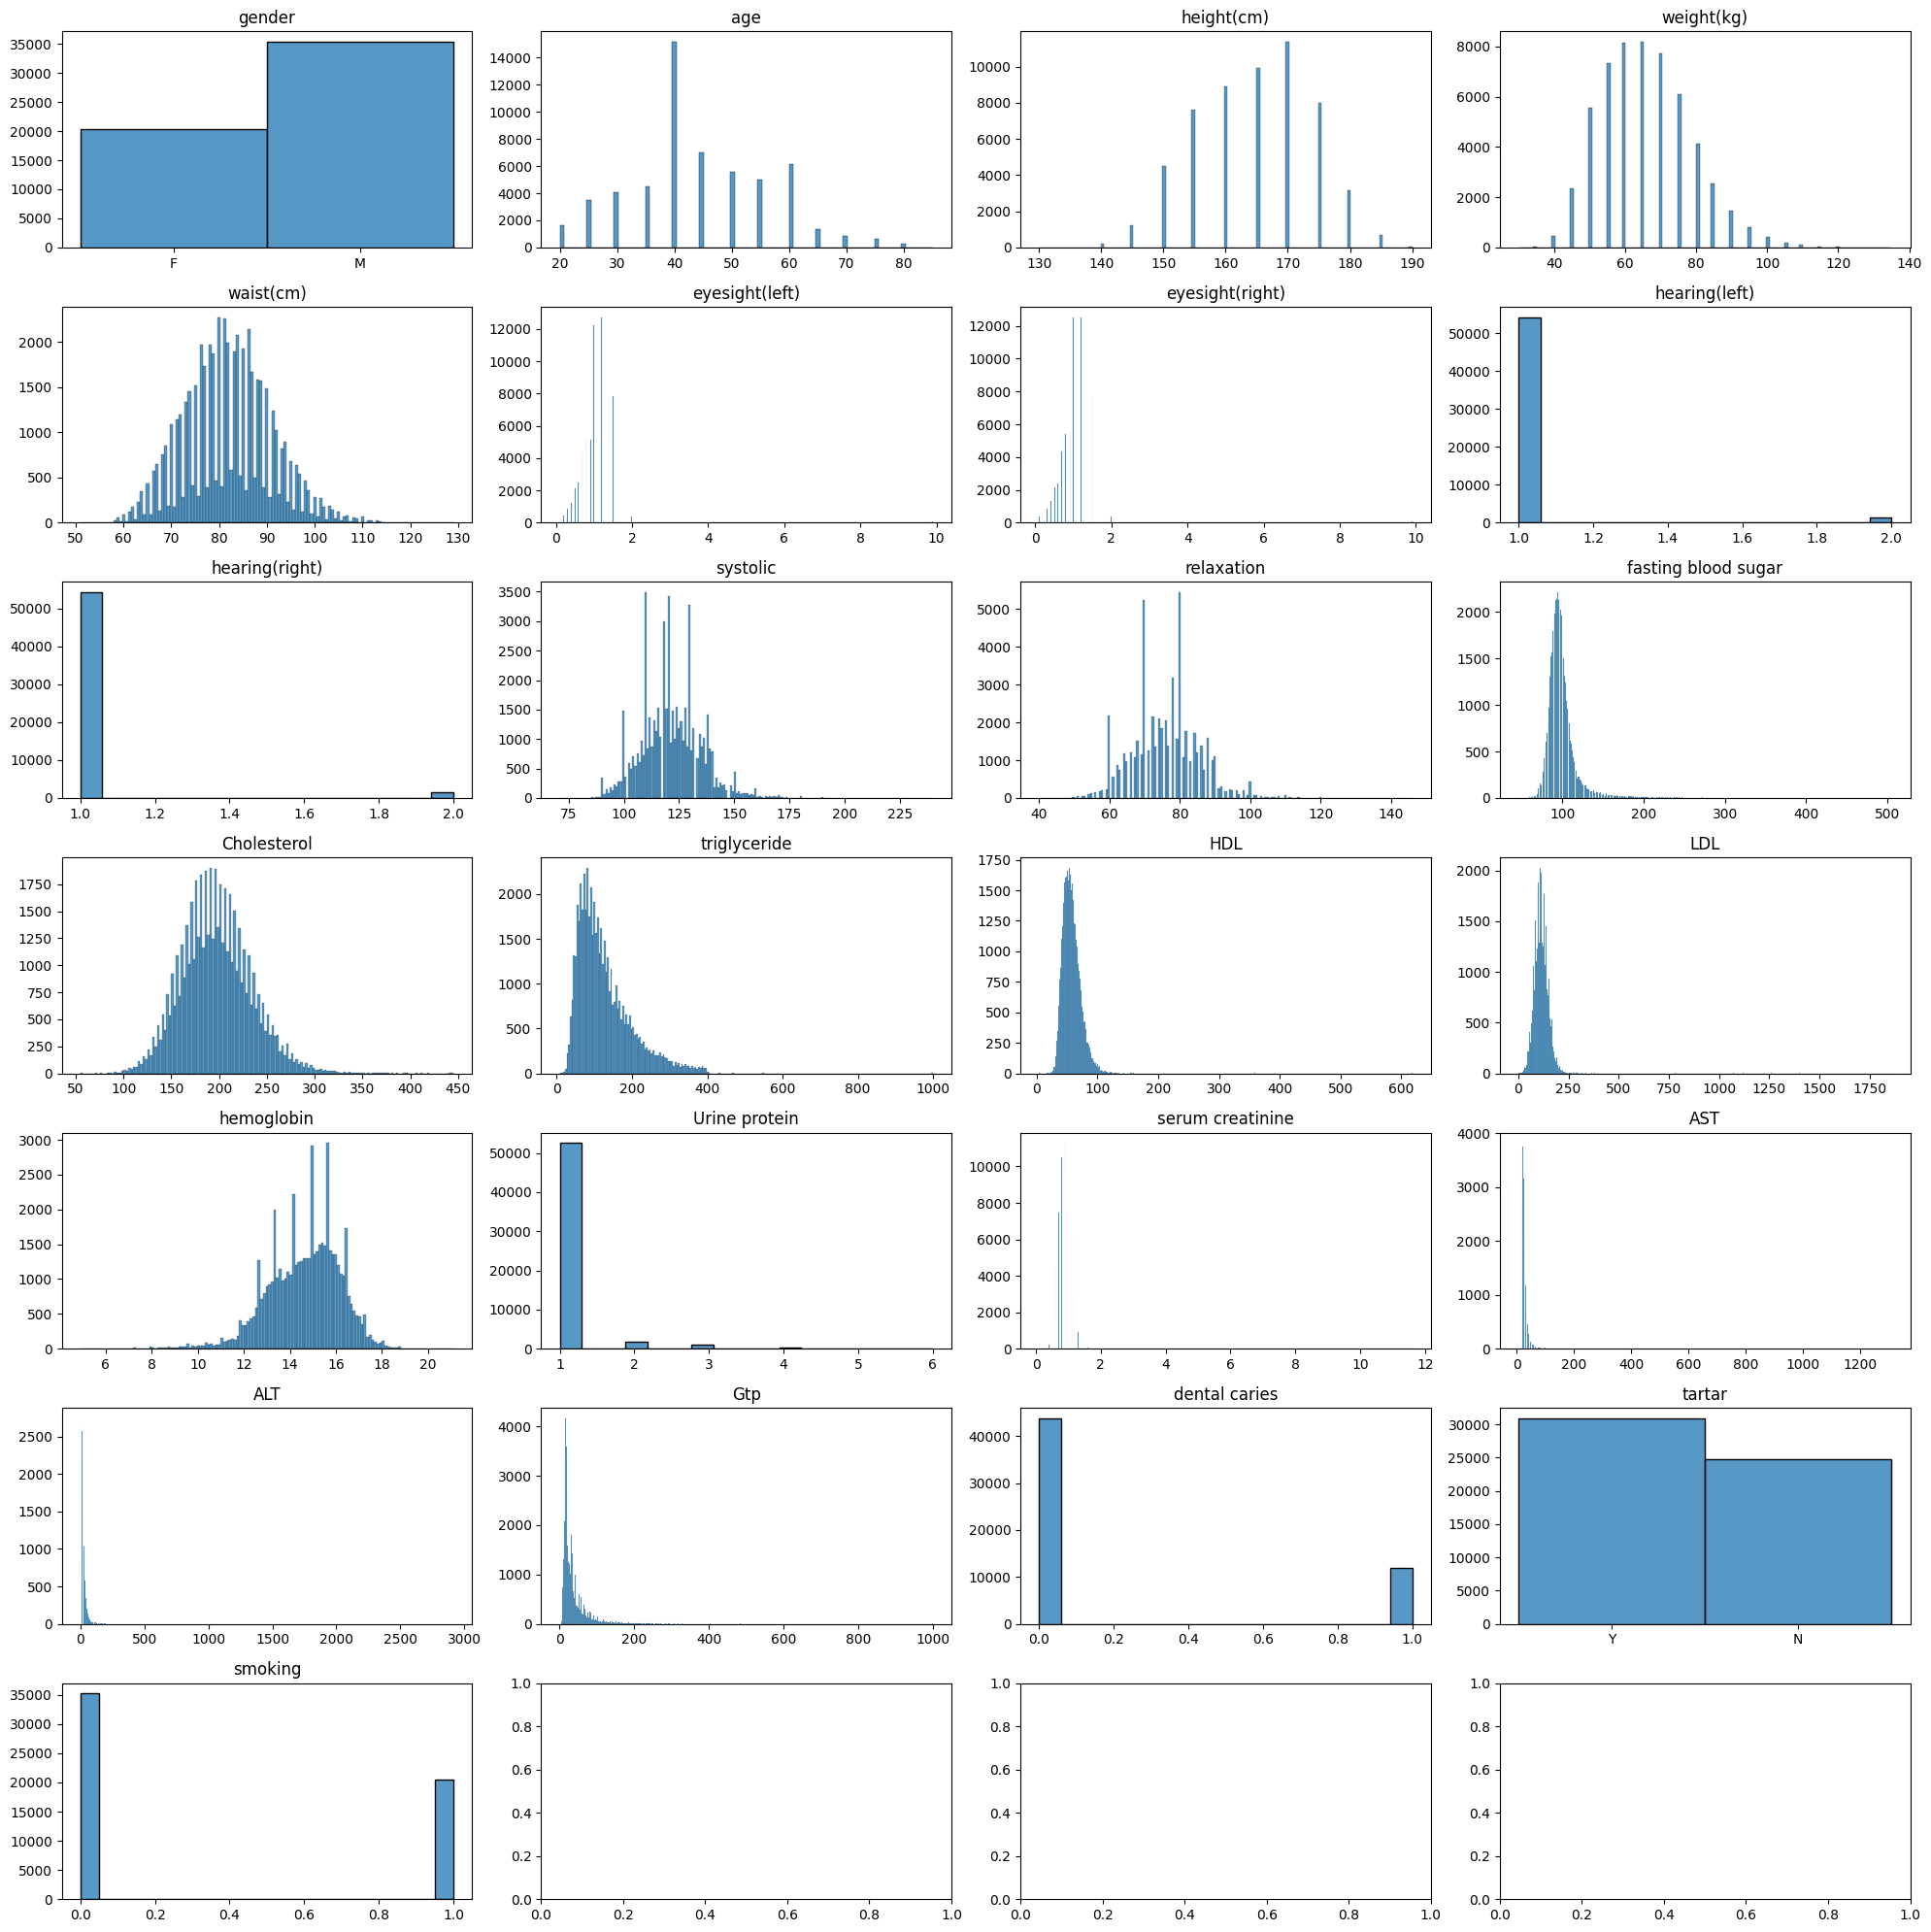

In [ ]:
columns = dataset.columns
n = len(columns)

fig, axes = plt.subplots(n//4+1, 4, figsize=(20, 20))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=dataset, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Labeliranje kategorickih tipova

In [ ]:
lista = ["gender", "tartar"]
for el in lista:
  possible_location = dataset[el].unique().tolist()
  # possible_location.insert(0,'nan')
  dict_help ={}
  for i in range(len(possible_location)):
    dict_help[possible_location[i]] = i
  print(dict_help)
  dataset.replace({el:dict_help},inplace = True)
dataset

{'F': 0, 'M': 1}
{'Y': 0, 'N': 1}


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,0,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,1,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

### Detekcija i otklanjanje outlier-a, normalizacija podataka

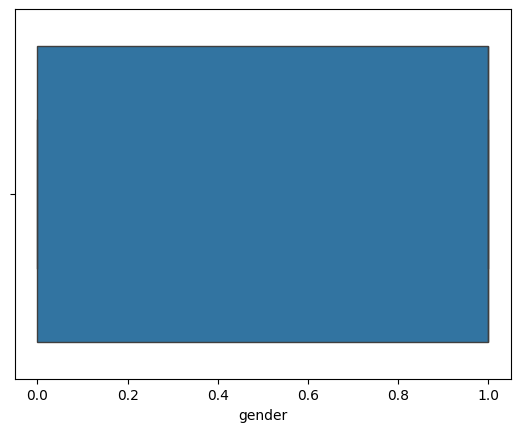

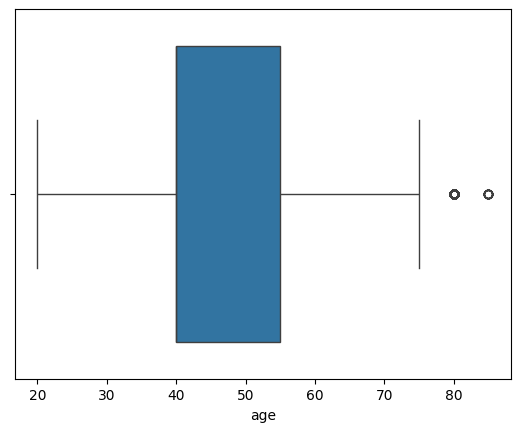

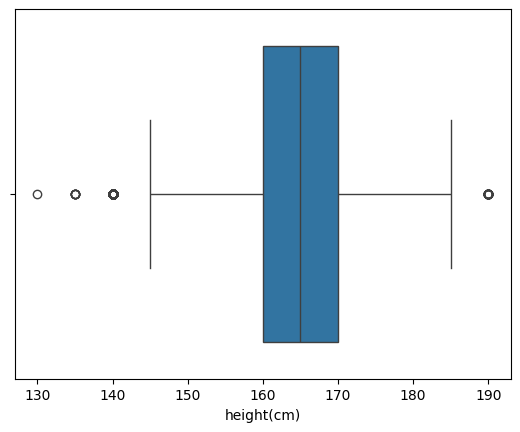

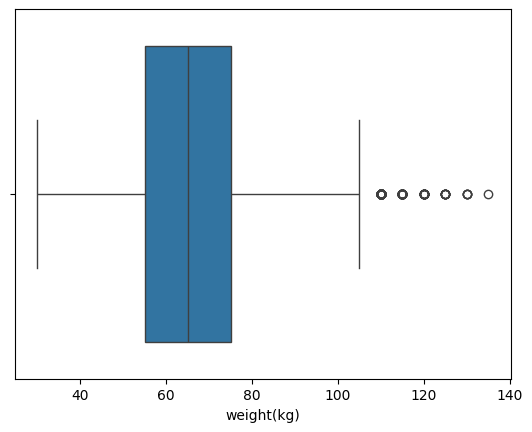

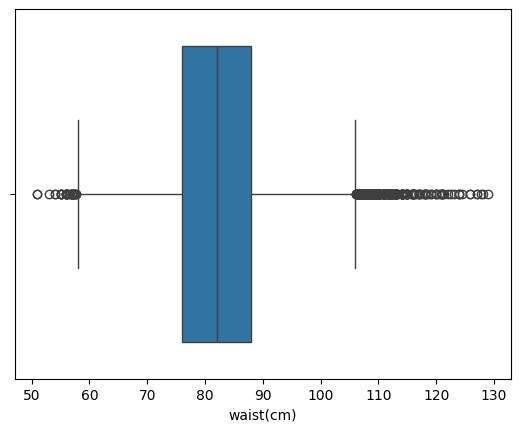

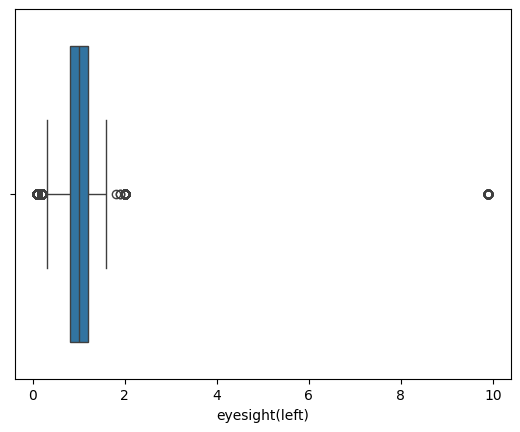

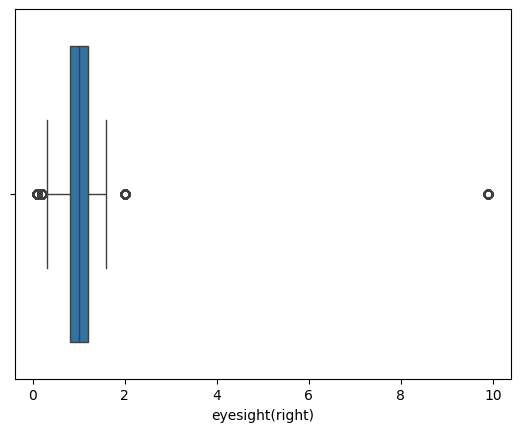

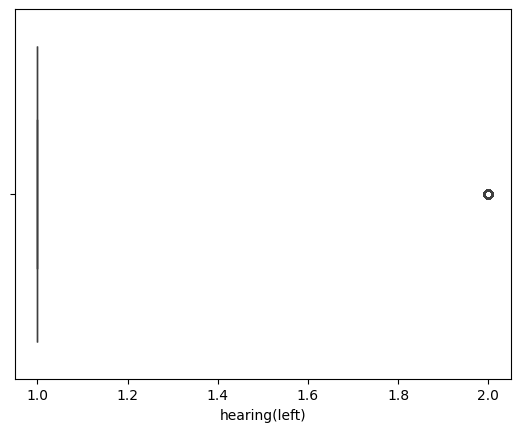

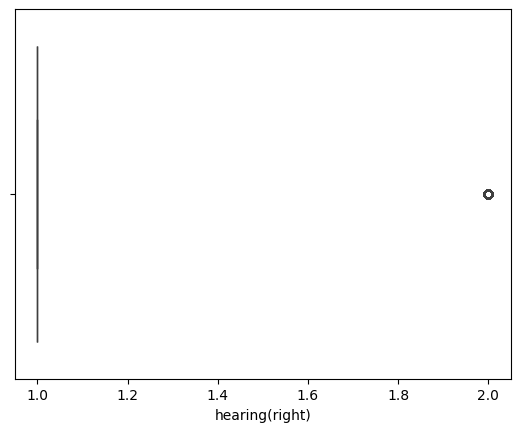

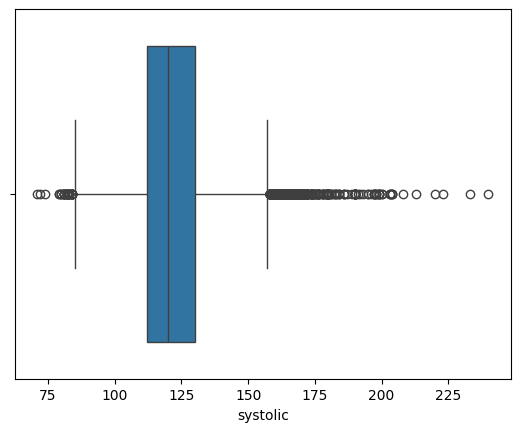

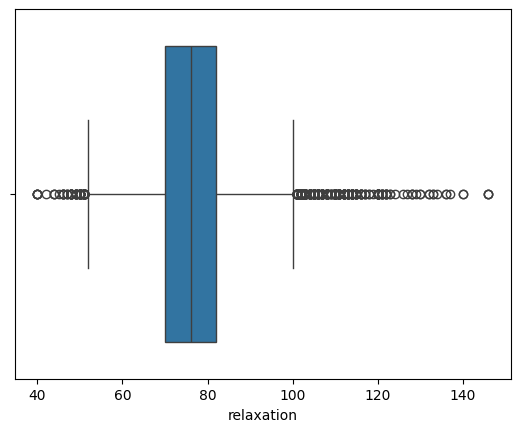

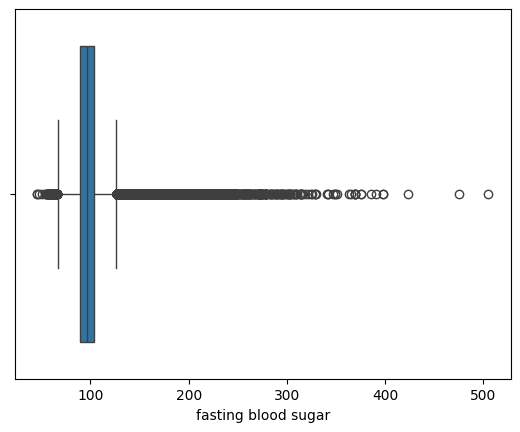

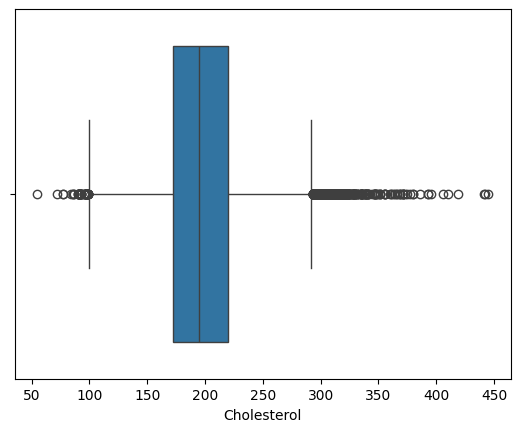

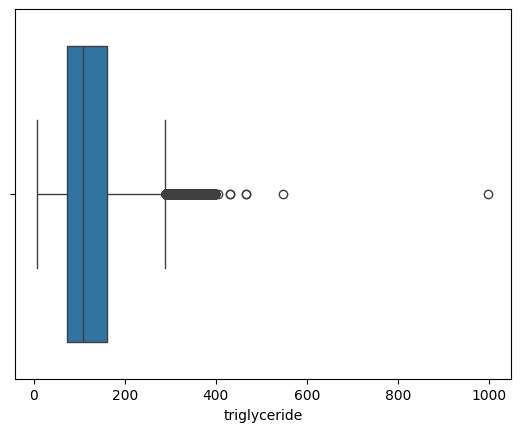

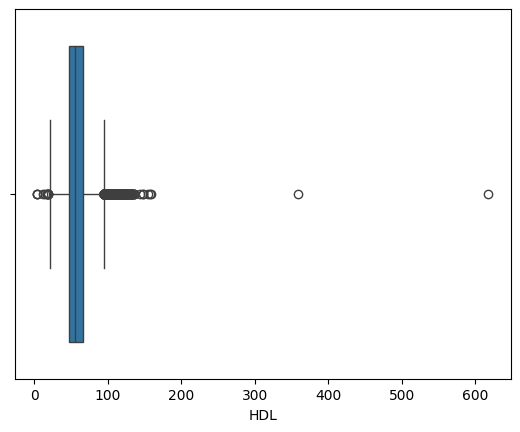

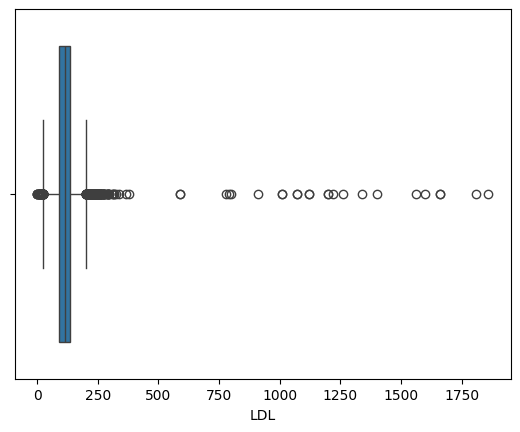

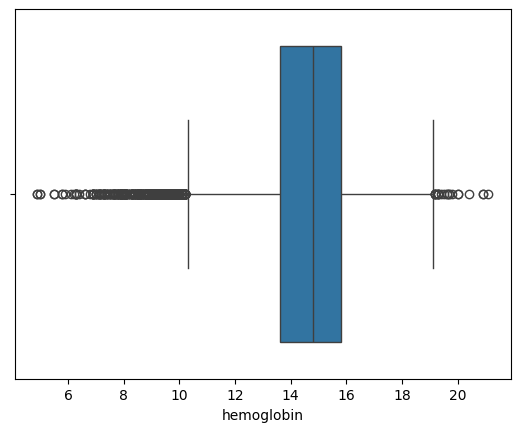

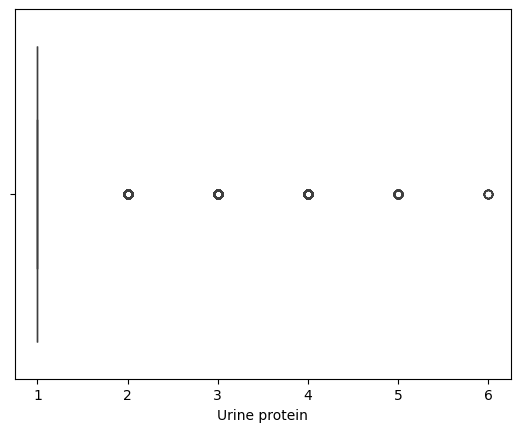

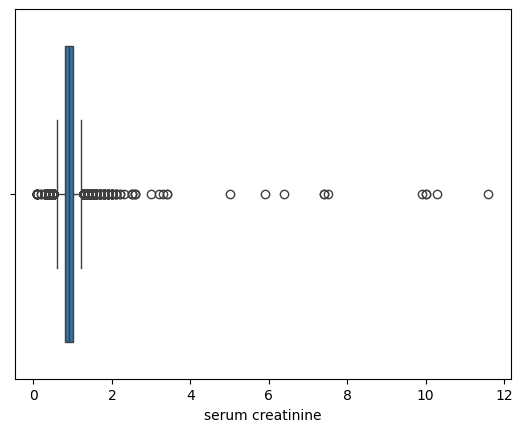

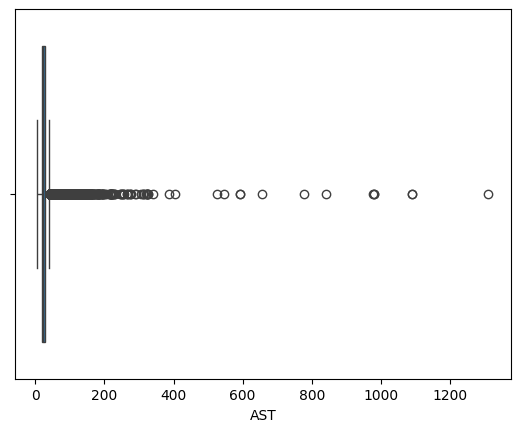

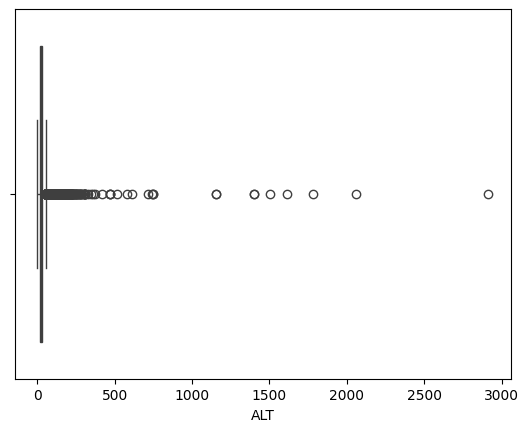

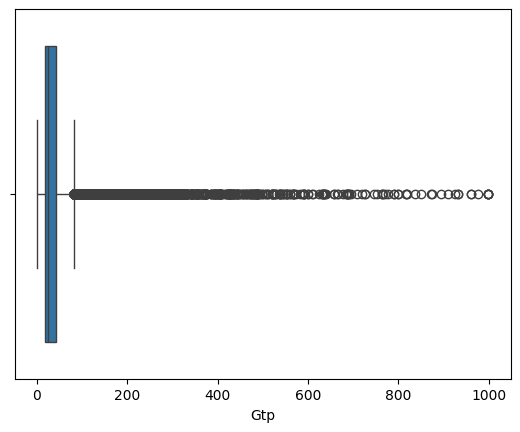

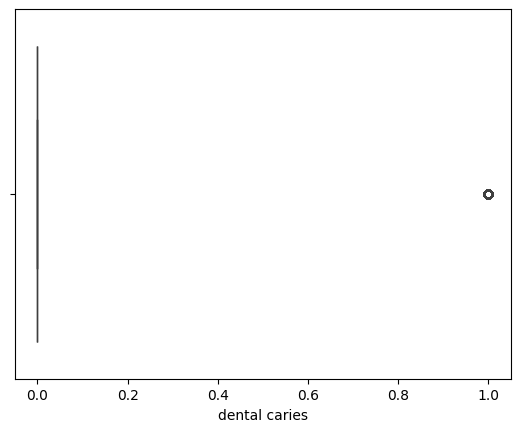

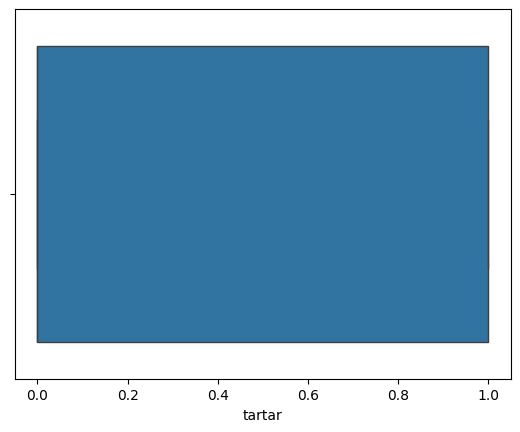

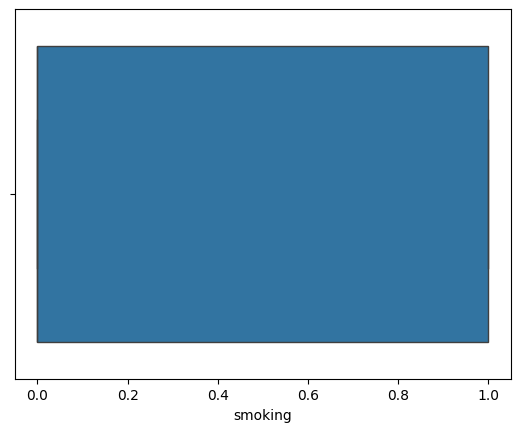

In [ ]:
lista = ["gender", "age", "height(cm)", "weight(kg)", "waist(cm)",
       "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)",
       "systolic", "relaxation", "fasting blood sugar", "Cholesterol",
       "triglyceride", "HDL", "LDL", "hemoglobin", "Urine protein",
       "serum creatinine", "AST", "ALT", "Gtp", "dental caries", "tartar", "smoking"]
for el in lista:
  sns.boxplot(x = dataset[el])
  plt.show()

In [ ]:
niz = dataset.index[dataset['fasting blood sugar'] > 400].tolist()
datset = dataset.drop(niz, axis = 0, inplace=True)

niz = dataset.index[dataset['triglyceride'] > 600].tolist()
datset = dataset.drop(niz, axis = 0, inplace=True)

niz = dataset.index[dataset['HDL'] > 300].tolist()
datset = dataset.drop(niz, axis = 0, inplace=True)

niz = dataset.index[dataset['AST'] > 300].tolist()
datset = dataset.drop(niz, axis = 0, inplace=True)

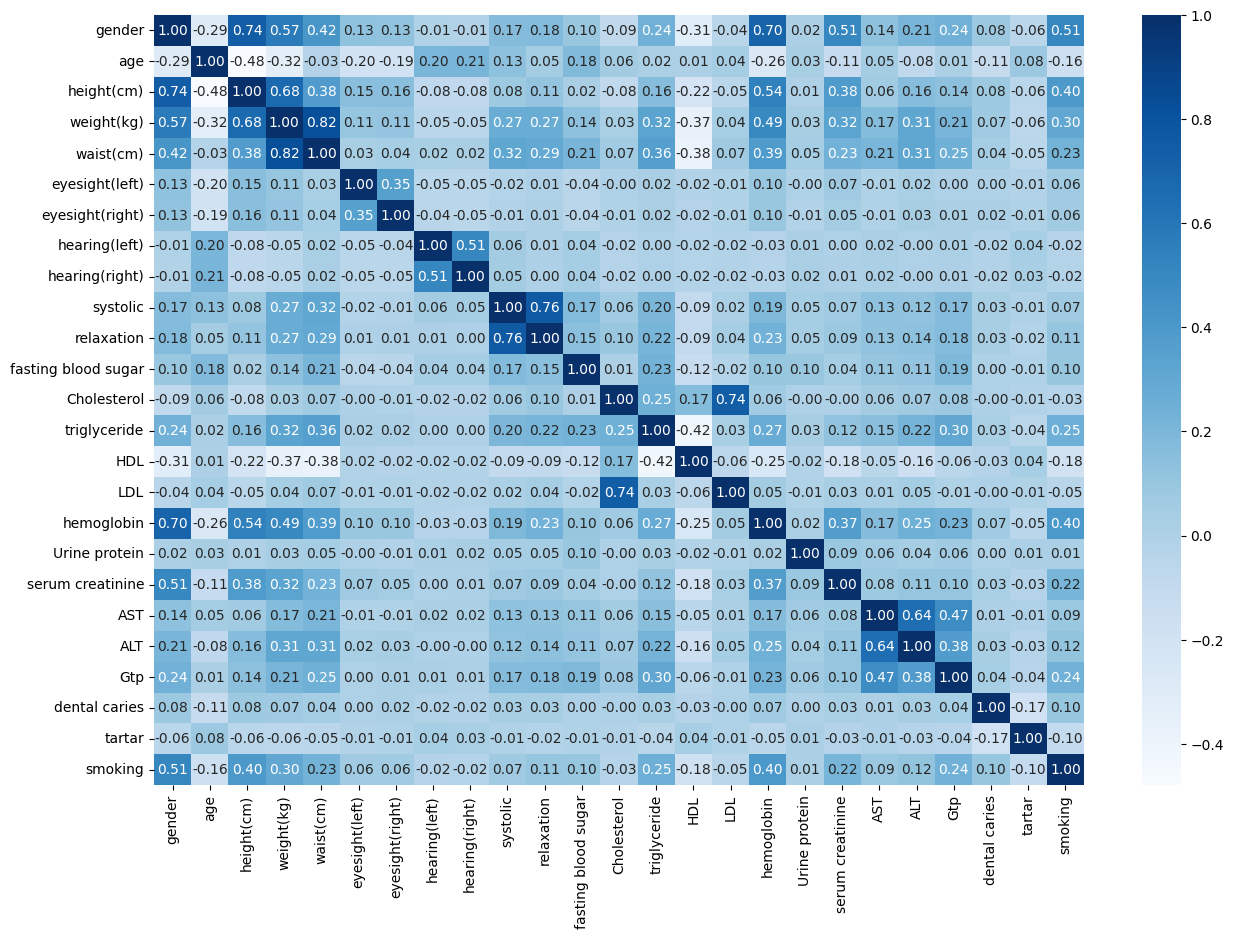

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

In [ ]:
lista = ["gender", "height(cm)", "weight(kg)", "waist(cm)", "triglyceride", "hemoglobin", "serum creatinine", "Gtp", "smoking"]
datset_important = dataset[lista]

In [ ]:
datset_important

,gender,height(cm),weight(kg),waist(cm),triglyceride,hemoglobin,serum creatinine,Gtp,smoking
0,0,155,60,81.3,82.0,12.9,0.7,27.0,0
1,0,160,60,81.0,115.0,12.7,0.6,18.0,0
2,1,170,60,80.0,182.0,15.8,1.0,22.0,1
3,1,165,70,88.0,254.0,14.7,1.0,18.0,0
4,0,155,60,86.0,74.0,12.5,0.6,22.0,0
...,...,...,...,...,...,...,...,...,...
55687,0,170,65,75.0,99.0,12.3,0.6,10.0,0
55688,0,160,50,70.0,69.0,14.0,0.9,14.0,0
55689,0,160,50,68.5,77.0,12.4,0.5,12.0,0
55690,1,165,60,78.0,79.0,14.4,0.7,18.0,0


## Provera da li je balansiran

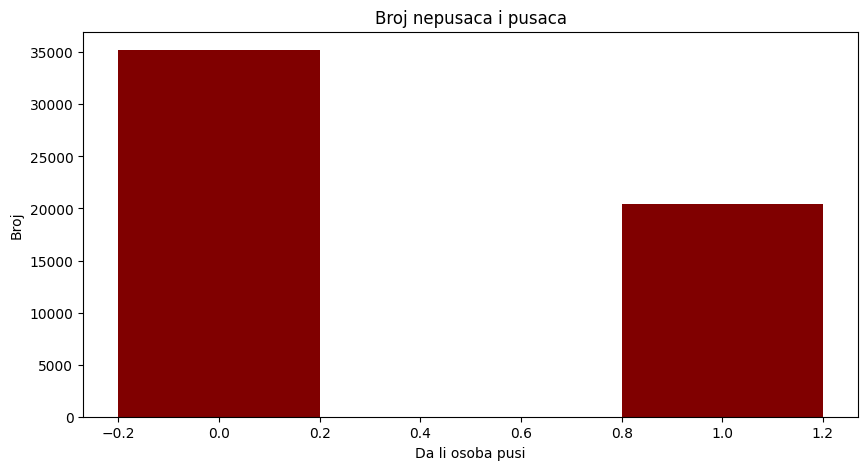

In [ ]:
x,y = dataset["smoking"].value_counts()
vrednosti = [0,1]
values = [x,y]
fig = plt.figure(figsize = (10, 5))
plt.bar(vrednosti, values, color ='maroon', width = 0.4)

plt.xlabel("Da li osoba pusi")
plt.ylabel("Broj")
plt.title("Broj nepusaca i pusaca")
plt.show()

### Balansiranje skupa podataka

In [ ]:
from sklearn.utils import resample


In [ ]:
df_majority = dataset[(dataset['smoking']==0)]
df_minority = dataset[(dataset['smoking']==1)]

In [ ]:
dataset['smoking'].value_counts()

0    35216
1    20444
Name: smoking, dtype: int64

In [ ]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 35237, # to match majority class
                                 random_state=42)

In [ ]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled['smoking'].value_counts()

1    35237
0    35216
Name: smoking, dtype: int64

##Skaliranje

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

scaler = MinMaxScaler()
normalize_columns = ["gender", "age", "height(cm)", "waist(cm)",
       "hearing(left)", "hearing(right)",
       "systolic", "relaxation",  "Cholesterol",
       "Urine protein",
       "serum creatinine",  "ALT",  "dental caries", "tartar", "smoking"]
normalized_data= scaler.fit_transform(dataset[normalize_columns])
balaced_normalized_data= scaler.fit_transform(df_upsampled[normalize_columns])

dataset[normalize_columns] = normalized_data
df_upsampled[normalize_columns] = balaced_normalized_data

scaler2 = MinMaxScaler()
normalize_columns2 = [ "weight(kg)",
       "eyesight(left)", "eyesight(right)",
        "fasting blood sugar",
       "triglyceride", "HDL", "LDL", "hemoglobin",  "AST","Gtp", ]
normalized_data2= scaler2.fit_transform(dataset[normalize_columns2])
balaced_normalized_data2= scaler2.fit_transform(df_upsampled[normalize_columns2])

dataset[normalize_columns2] = normalized_data2
df_upsampled[normalize_columns2] = balaced_normalized_data2

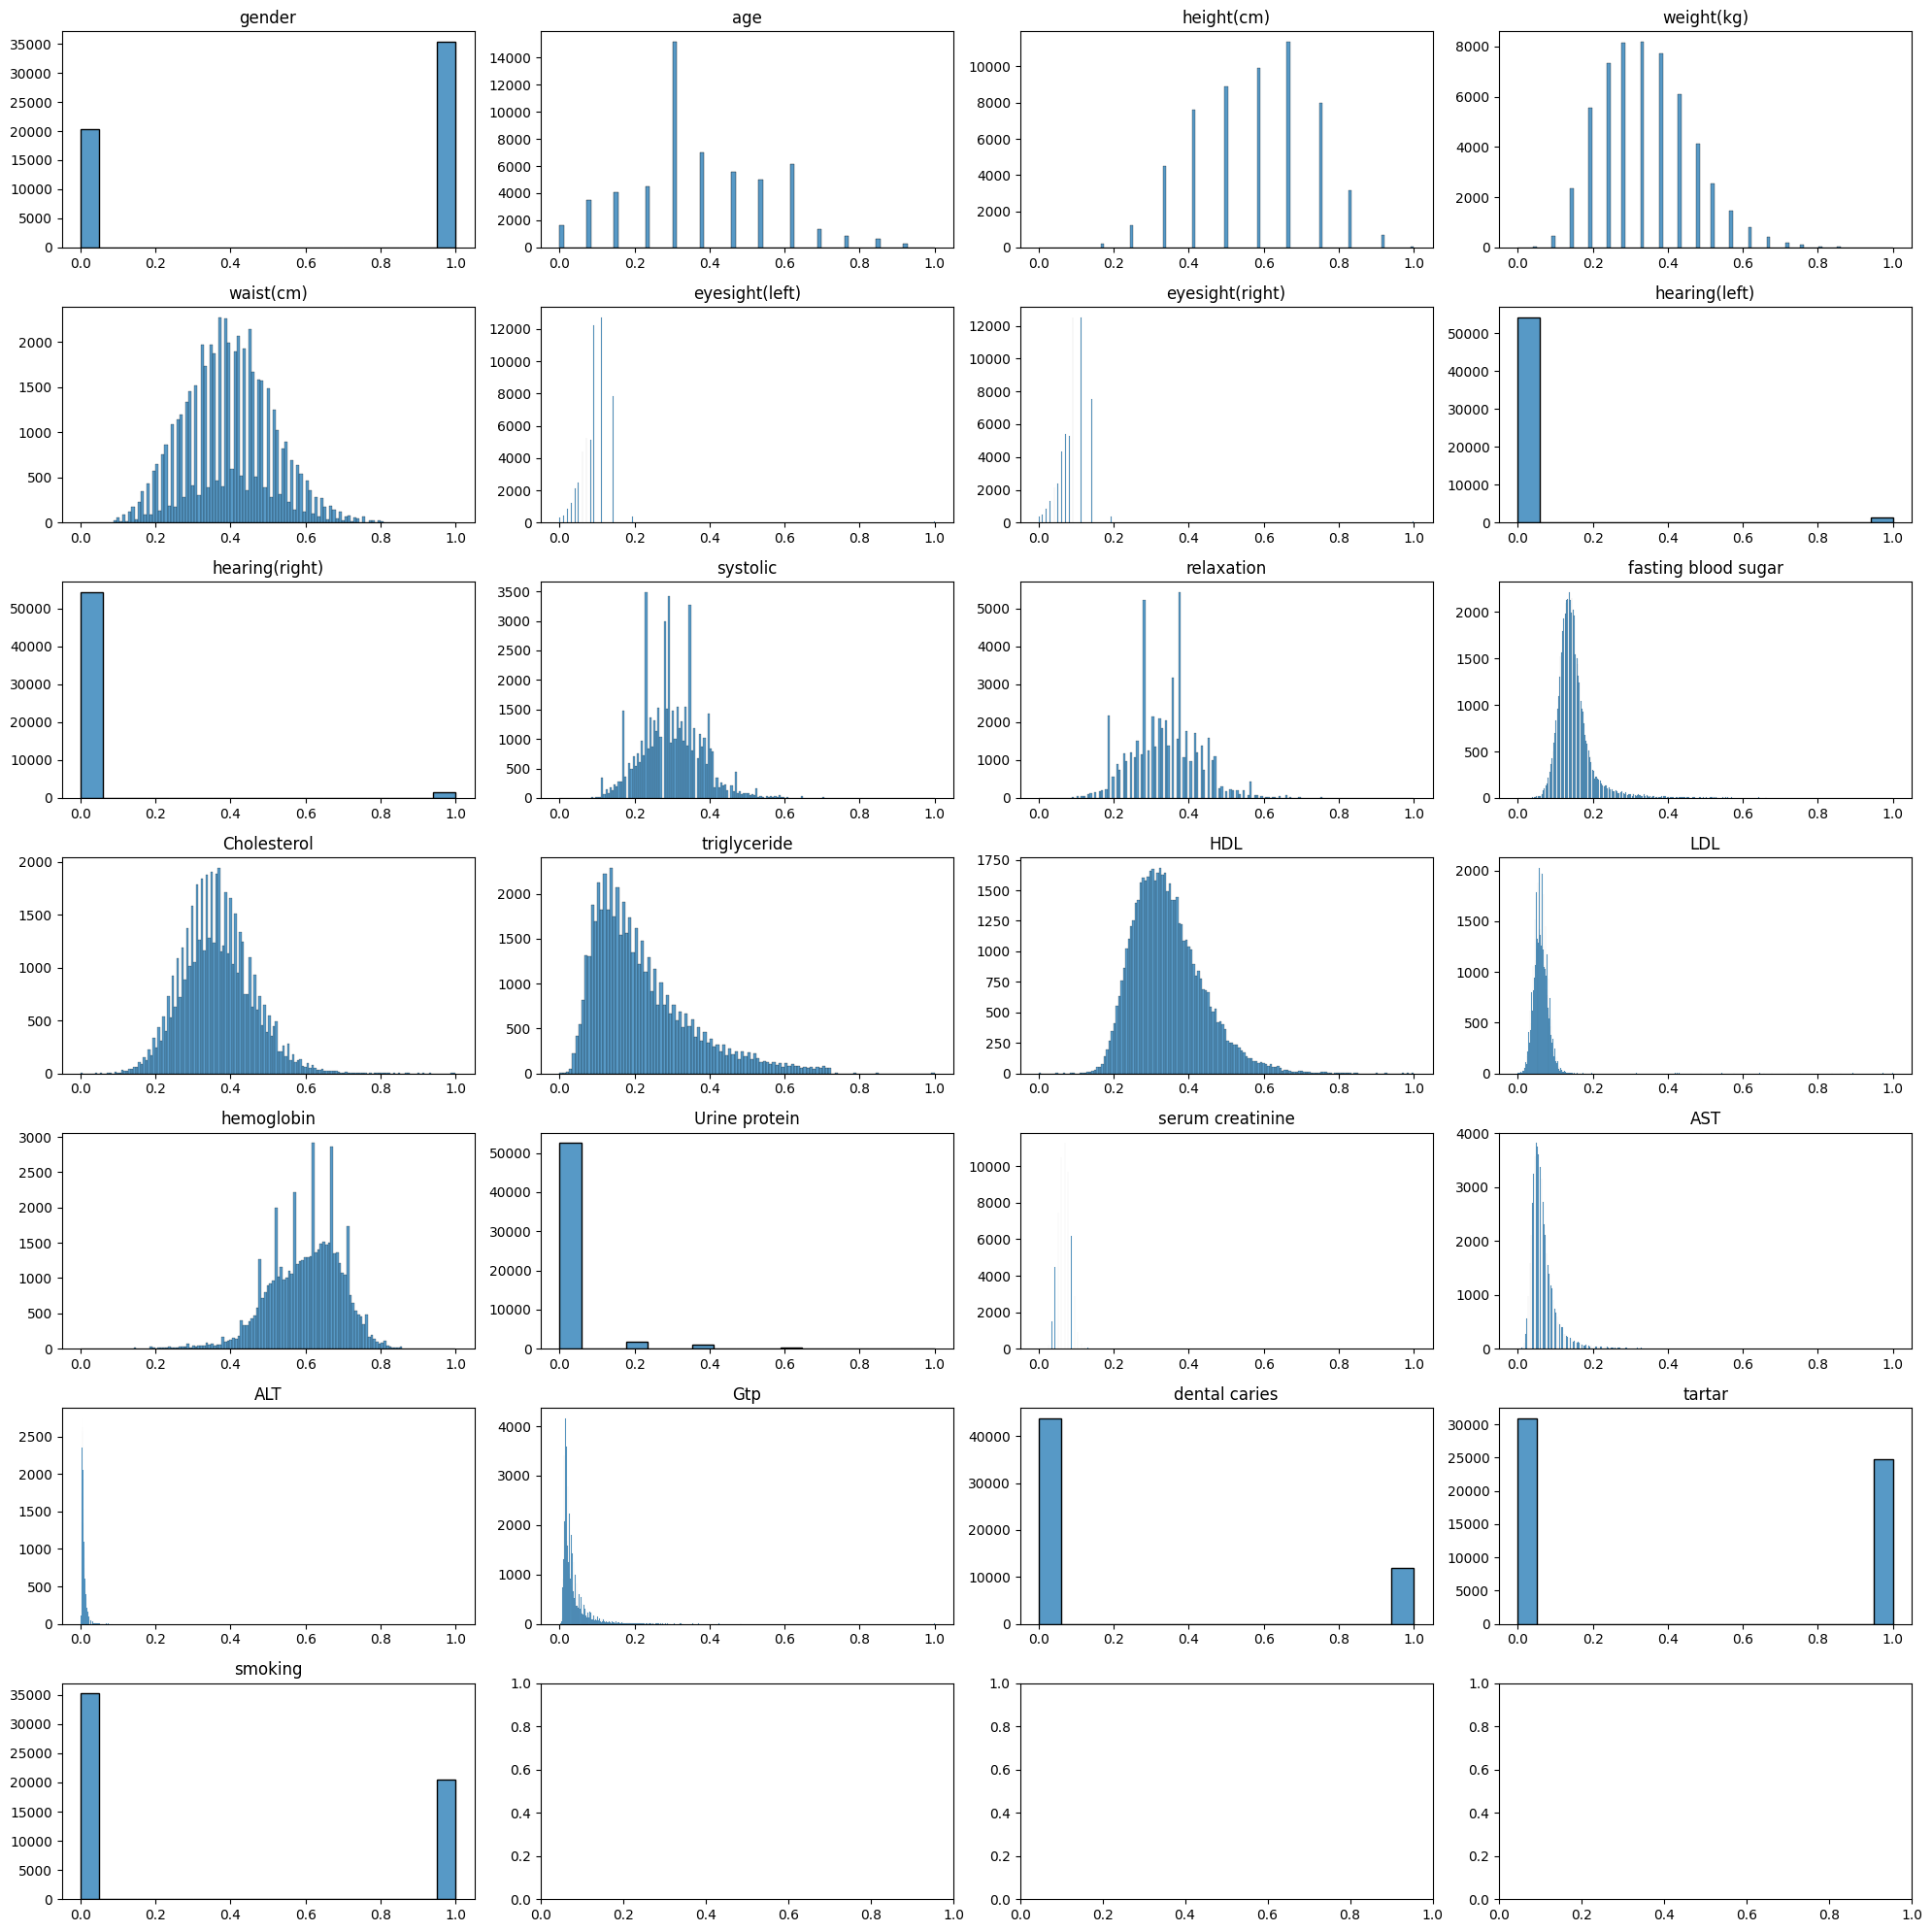

In [ ]:
columns = dataset.columns
n = len(columns)

fig, axes = plt.subplots(n//4+1, 4, figsize=(20, 20))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=dataset, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### Spliting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = 'smoking'

y = dataset[target]
X = dataset.drop(columns=[target])

# Split important data
X_im = datset_important.drop(columns=[target])
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_im, y, test_size=0.2, random_state=42)
X_train_im, X_val_im, y_train_im, y_val_im = train_test_split(X_train_im, y_train_im, test_size=0.3, random_state=42)

# Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


y_balanced = df_upsampled[target]
X_balanced = df_upsampled.drop(columns=[target])
# Split balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_balanced, y_train_balanced, test_size=0.3, random_state=42)

# For original data
print("Length of X_train: ", len(X_train), "\tLength of X_val: ", len(X_val), "\tLength of X_test: ", len(X_test))
print("Length of y_train: ", len(y_train), "\tLength of y_val: ", len(y_val), "\tLength of y_test: ", len(y_test))
print("Shape of X_train: ", np.shape(X_train), "\tShape of y_train: ", np.shape(y_train))

# For important data
print("Length of X_train_important: ", len(X_train_im), "\tLength of X_val_important: ", len(X_val_im), "\tLength of X_test_important: ", len(X_test_im))
print("Length of y_train_important: ", len(y_train_im), "\tLength of y_val_important: ", len(y_val_im), "\tLength of y_test_important: ", len(y_test_im))
print("Shape of X_train_important: ", np.shape(X_train_im), "\tShape of y_train_important: ", np.shape(y_train_im))

# For balanced data
print("\nBalanced Data:")
print("Length of X_train_balanced: ", len(X_train_balanced), "\tLength of X_val_balanced: ", len(X_val_balanced), "\tLength of X_test_balanced: ", len(X_test_balanced))
print("Length of y_train_balanced: ", len(y_train_balanced), "\tLength of y_val_balanced: ", len(y_val_balanced), "\tLength of y_test_balanced: ", len(y_test_balanced))
print("Shape of X_train_balanced: ", np.shape(X_train_balanced), "\tShape of y_train_balanced: ", np.shape(y_train_balanced))

Length of X_train:  31169 	Length of X_val:  13359 	Length of X_test:  11132
Length of y_train:  31169 	Length of y_val:  13359 	Length of y_test:  11132
Shape of X_train:  (31169, 24) 	Shape of y_train:  (31169,)
Length of X_train_important:  31169 	Length of X_val_important:  13359 	Length of X_test_important:  11132
Length of y_train_important:  31169 	Length of y_val_important:  13359 	Length of y_test_important:  11132
Shape of X_train_important:  (31169, 8) 	Shape of y_train_important:  (31169,)

Balanced Data:
Length of X_train_balanced:  39453 	Length of X_val_balanced:  16909 	Length of X_test_balanced:  14091
Length of y_train_balanced:  39453 	Length of y_val_balanced:  16909 	Length of y_test_balanced:  14091
Shape of X_train_balanced:  (39453, 24) 	Shape of y_train_balanced:  (39453,)


In [ ]:
X_train_balanced.head()


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
31116,1.0,0.384615,0.666667,0.571429,0.643590,0.142857,0.081633,0.0,0.0,0.327381,...,0.322581,0.088757,0.796296,0.0,0.078261,0.148410,0.021627,0.104208,0.0,0.0
24217,0.0,0.384615,0.500000,0.190476,0.305128,0.061224,0.091837,0.0,0.0,0.250000,...,0.251613,0.088219,0.567901,0.0,0.043478,0.056537,0.004806,0.014028,0.0,0.0
14363,1.0,0.307692,0.666667,0.333333,0.307692,0.112245,0.112245,0.0,0.0,0.285714,...,0.238710,0.075309,0.666667,0.2,0.069565,0.031802,0.005149,0.055110,0.0,0.0
34261,1.0,0.307692,0.583333,0.666667,0.756410,0.091837,0.081633,0.0,0.0,0.345238,...,0.270968,0.086606,0.685185,0.0,0.095652,0.212014,0.042911,0.124248,0.0,1.0
18967,1.0,0.461538,0.500000,0.190476,0.217949,0.091837,0.081633,0.0,1.0,0.398810,...,0.529032,0.021517,0.617284,0.0,0.078261,0.098940,0.007896,0.028056,0.0,0.0


In [ ]:
X_train_im.head()


,gender,height(cm),weight(kg),waist(cm),triglyceride,hemoglobin,serum creatinine,Gtp
45533,1,165,60,70.0,93.0,15.1,0.9,20.0
42563,1,175,85,93.0,167.0,16.0,1.1,32.0
37417,1,170,60,76.0,59.0,16.7,0.8,23.0
49516,0,160,45,67.0,40.0,12.9,0.6,9.0
26317,1,165,80,85.0,63.0,15.1,1.2,15.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam

## Creating Artificial Neural Network Models


### Log function

In [ ]:
def printHistory(history_, name):
    training_loss = history_.history["loss"]
    test_loss = history_.history["val_loss"]
    training_accuracy = history_.history["accuracy"]
    test_accuracy = history_.history["val_accuracy"]

    epoch_count = range(1, len(training_loss) + 1)

    fig = plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Val Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(name)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")
    plt.legend(["Training Accuracy", "Val Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")
    plt.title(name)


    plt.show()


### Creating different models



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
def createNetwork(X_train, activation, opt, learning_rate, loss="binary_crossentropy"):
    if opt == "Adam":
      optimizer = Adam(learning_rate=learning_rate)
    elif opt == "Adamax":
      optimizer = Adamax(learning_rate=learning_rate)
    elif opt == "Nadam":
      optimizer = Nadam(learning_rate=learning_rate)
    else:
      return 0
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))

    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return network_

Epoch 1/50
488/488 [==============================] - 3s 4ms/step - loss: 0.5186 - accuracy: 0.7011 - val_loss: 0.4938 - val_accuracy: 0.7055
Epoch 2/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4784 - accuracy: 0.7349 - val_loss: 0.4796 - val_accuracy: 0.7349
Epoch 3/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4739 - accuracy: 0.7422 - val_loss: 0.4777 - val_accuracy: 0.7385
Epoch 4/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.7473 - val_loss: 0.4775 - val_accuracy: 0.7373
Epoch 5/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.7486 - val_loss: 0.4721 - val_accuracy: 0.7464
Epoch 6/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4680 - accuracy: 0.7507 - val_loss: 0.4786 - val_accuracy: 0.7345
Epoch 7/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4669 - accuracy: 0.7508 - val_loss: 0.4717 - val_accuracy: 0.7461
Epoch 

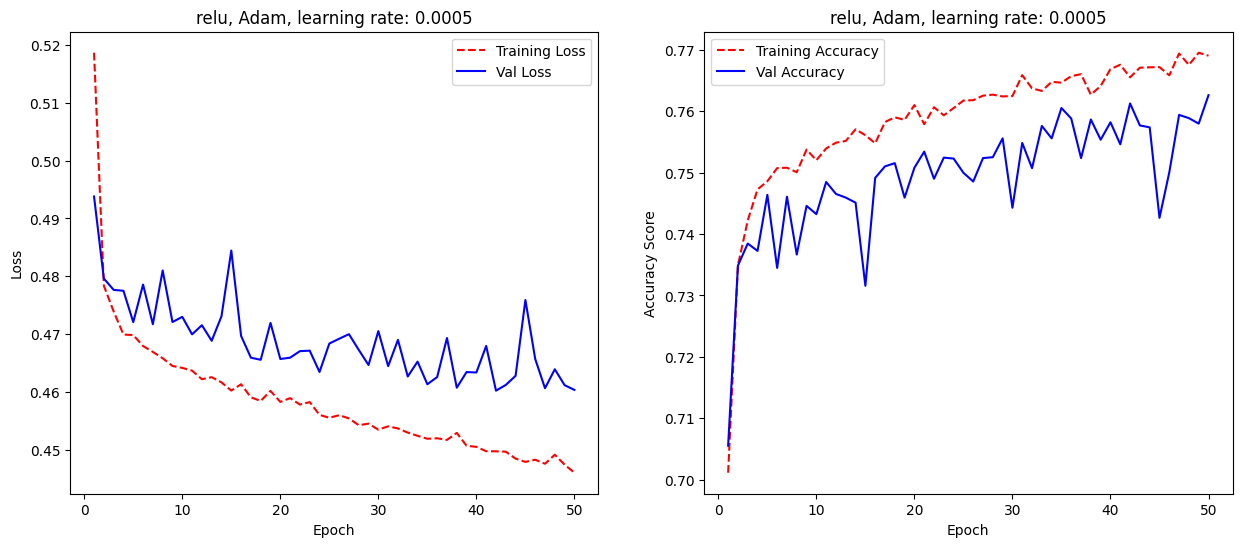

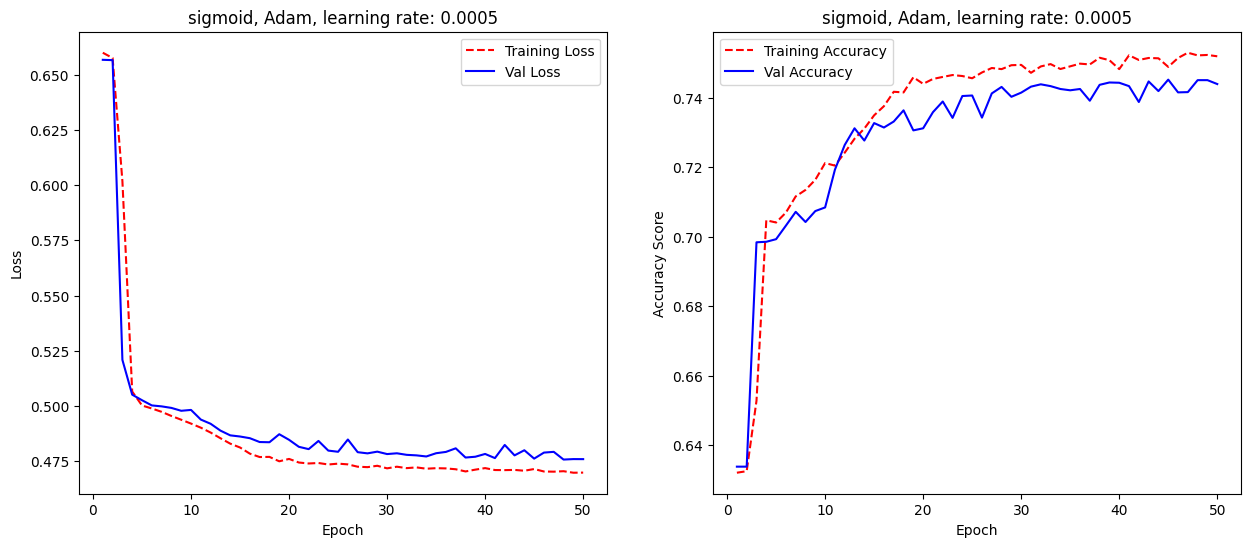

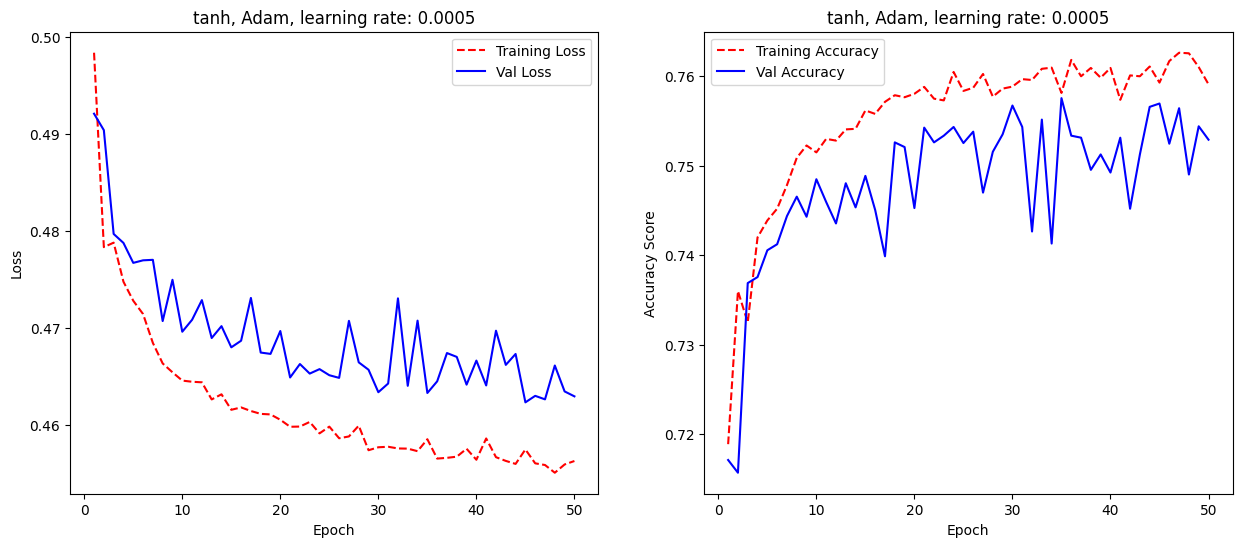

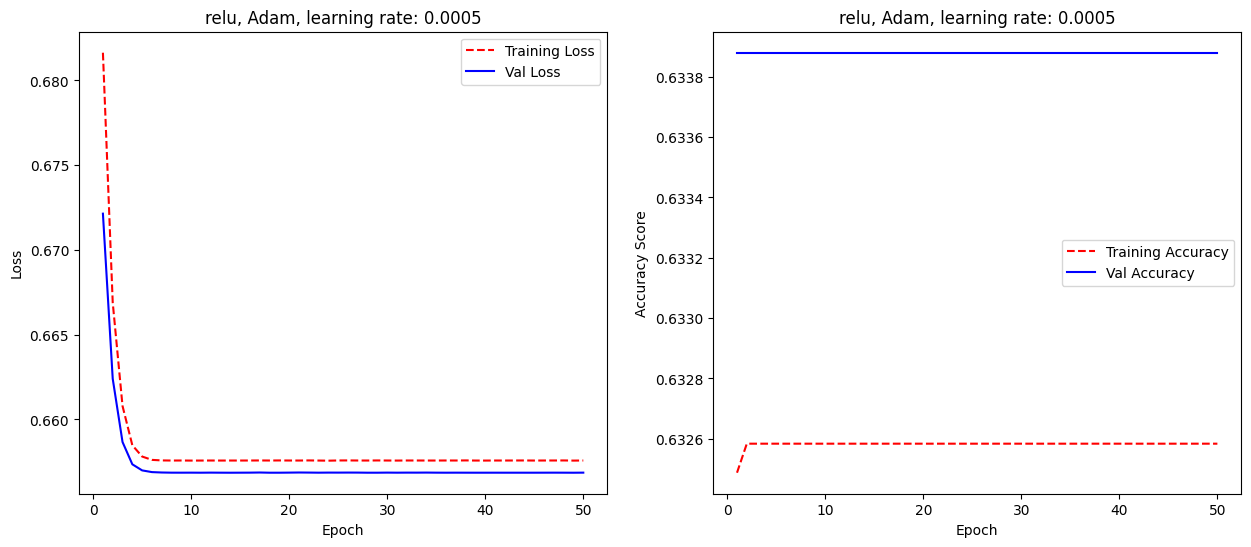

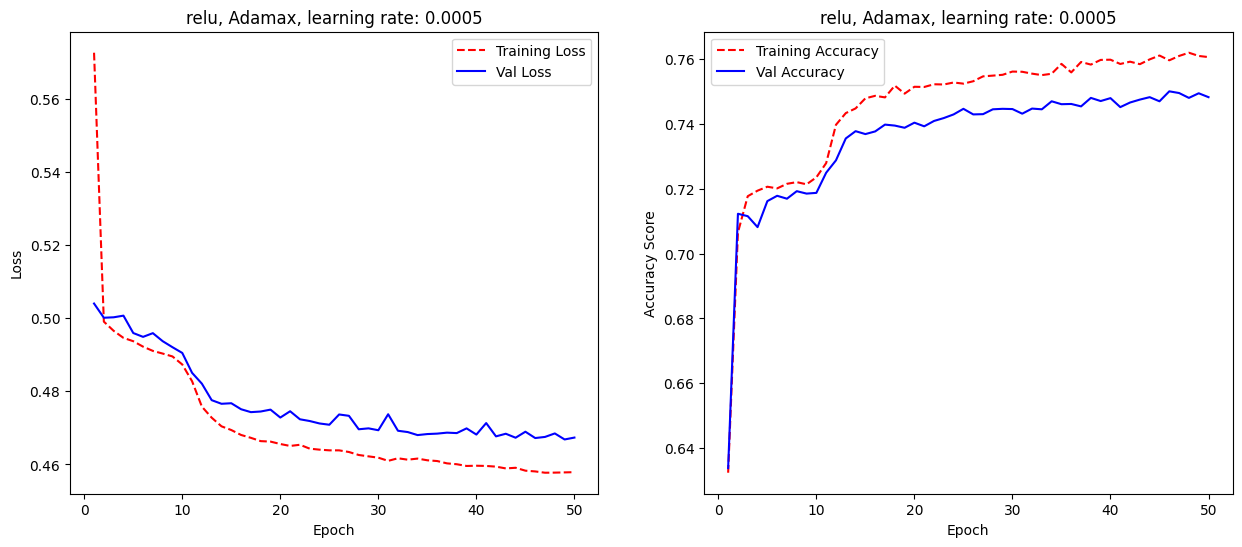

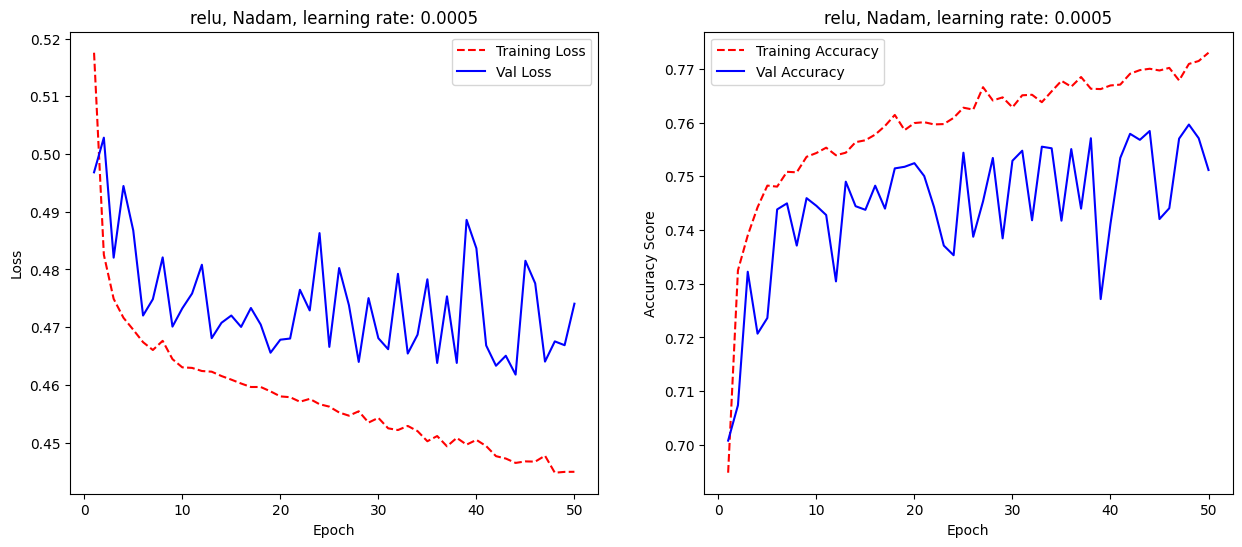

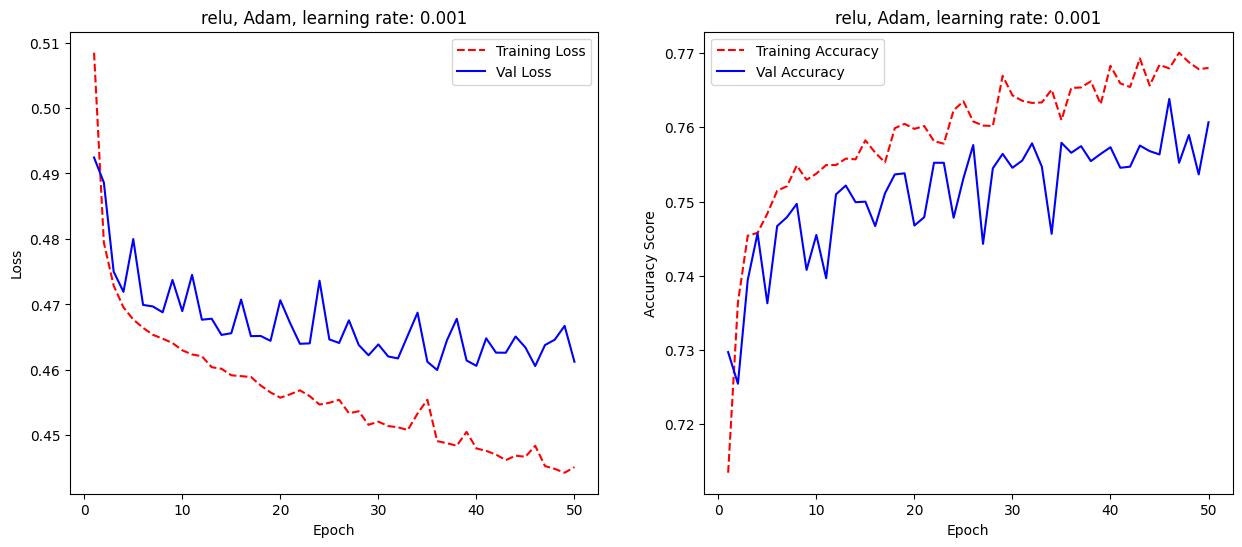

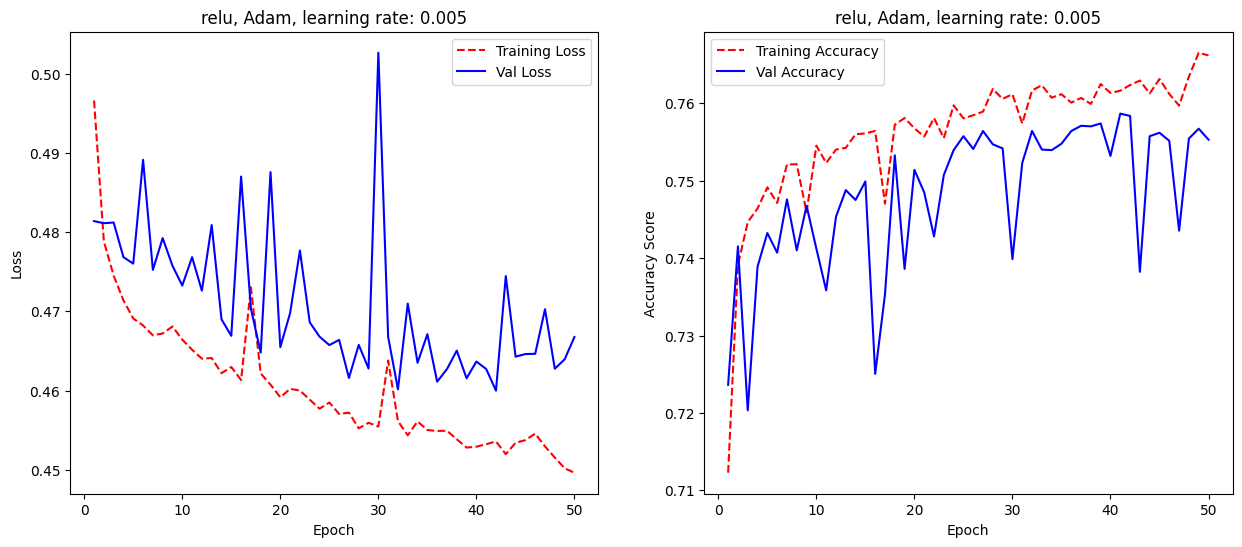

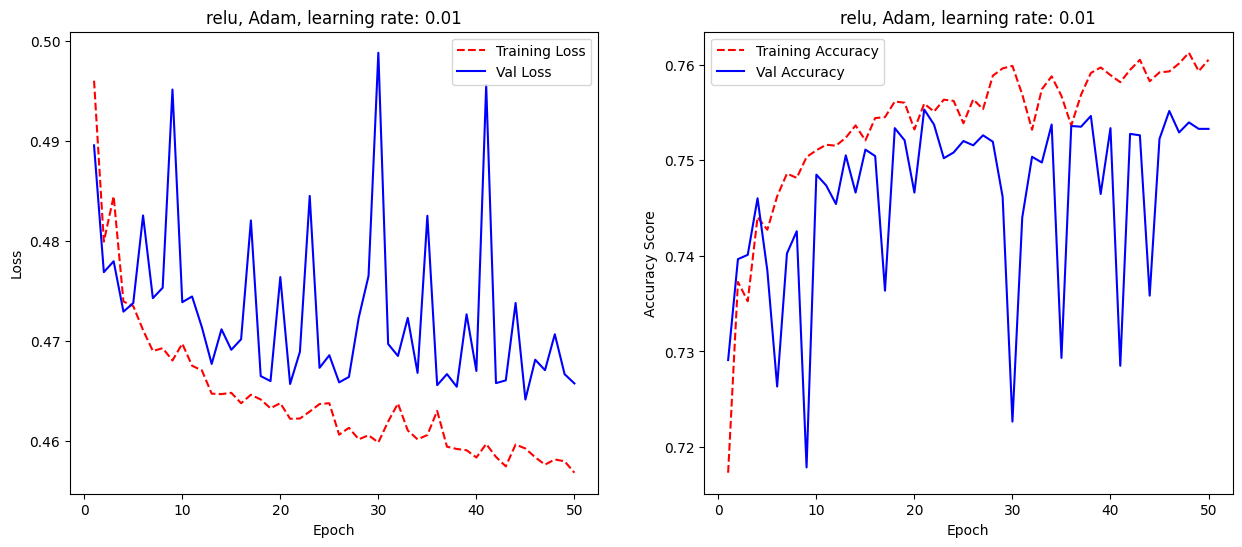

relu, Adam, learning rate: 0.0005 preciznost je:  0.7597017884254456
sigmoid, Adam, learning rate: 0.0005 preciznost je:  0.7488321661949158
tanh, Adam, learning rate: 0.0005 preciznost je:  0.7550305128097534
relu, Adam, learning rate: 0.0005 preciznost je:  0.6316025853157043
relu, Adamax, learning rate: 0.0005 preciznost je:  0.754042387008667
relu, Nadam, learning rate: 0.0005 preciznost je:  0.7549406886100769
relu, Adam, learning rate: 0.001 preciznost je:  0.7625763416290283
relu, Adam, learning rate: 0.005 preciznost je:  0.7563779950141907
relu, Adam, learning rate: 0.01 preciznost je:  0.7574560046195984


In [ ]:
lista = ["relu", "sigmoid", "tanh"]
history = []
name = ""
niz_name = []
niz_acc = []
for el in lista:
  network=createNetwork(X_train, el, "Adam", 0.0005)
  name = str(el) + ", Adam, learning rate: " + "0.0005"
  history.append([network.fit(X_train,
                              y_train,
                              epochs=50,
                              verbose=1,
                              batch_size=64,
                              #validation_split=0.3
                              validation_data=(X_val, y_val),
                              ), name])
  niz_name.append(name)
  test_loss, test_acc = network.evaluate(X_test, y_test)
  niz_acc.append(test_acc)

lista = ["Adam", "Adamax", "Nadam"]

for opt in lista:
  network=createNetwork(X_train, "relu", opt, 0.0005)
  name = "relu, " + str(opt) + ", learning rate: " + "0.0005"
  history.append([network.fit(X_train,
                              y_train,
                              epochs=50,
                              verbose=1,
                              batch_size=64,
                              #validation_split=0.3
                              validation_data=(X_val, y_val),
                              ),name])
  niz_name.append(name)
  test_loss, test_acc = network.evaluate(X_test, y_test)
  niz_acc.append(test_acc)

lista = [0.001, 0.005, 0.01]

for lr in lista:
  network=createNetwork(X_train, "relu", "Adam", lr)
  name = "relu, " +"Adam, " + "learning rate: " + str(lr)
  history.append([network.fit(X_train,
                                y_train,
                                epochs=50,
                                verbose=1,
                                batch_size=64,
                                #validation_split=0.3
                                validation_data=(X_val, y_val),
                                ),name])
  niz_name.append(name)
  test_loss, test_acc = network.evaluate(X_test, y_test)
  niz_acc.append(test_acc)

for h in history:
  printHistory(h[0], h[1])

i = 0
for el in niz_acc:
  print(niz_name[i] + " preciznost je:  " + str(el))
  i =i + 1


In [ ]:
def printHistory2(history_):
    training_loss = history_.history["loss"]
    test_loss = history_.history["val_loss"]
    training_accuracy = history_.history["accuracy"]
    test_accuracy = history_.history["val_accuracy"]
    lr_values = history_.history["lr"]

    epoch_count = range(1, len(training_loss) + 1)

    fig = plt.figure(figsize=(20, 6))

    plt.subplot(1, 3, 1)
    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Val Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(1, 3, 2)
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")
    plt.legend(["Training Accuracy", "Val Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")

    plt.subplot(1, 3, 3)
    plt.plot(epoch_count, lr_values, "g-")
    plt.legend(["Learning Rate"])
    plt.xlabel("Epoch")
    plt.ylabel("Learning Rate")


In [ ]:
import tensorflow as tf


Epoch 1/50
488/488 [==============================] - 3s 3ms/step - loss: 0.5159 - accuracy: 0.7044 - val_loss: 0.5033 - val_accuracy: 0.6971 - lr: 0.0100
Epoch 2/50
488/488 [==============================] - 1s 3ms/step - loss: 0.5037 - accuracy: 0.7118 - val_loss: 0.4915 - val_accuracy: 0.7362 - lr: 0.0100
Epoch 3/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.7293 - val_loss: 0.4788 - val_accuracy: 0.7429 - lr: 0.0100
Epoch 4/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.7304 - val_loss: 0.4847 - val_accuracy: 0.7417 - lr: 0.0100
Epoch 5/50
488/488 [==============================] - 2s 3ms/step - loss: 0.4932 - accuracy: 0.7329 - val_loss: 0.4775 - val_accuracy: 0.7426 - lr: 0.0100
Epoch 6/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4968 - accuracy: 0.7319 - val_loss: 0.4788 - val_accuracy: 0.7429 - lr: 0.0165
Epoch 7/50
488/488 [==============================] - 2s 3ms/step - lo

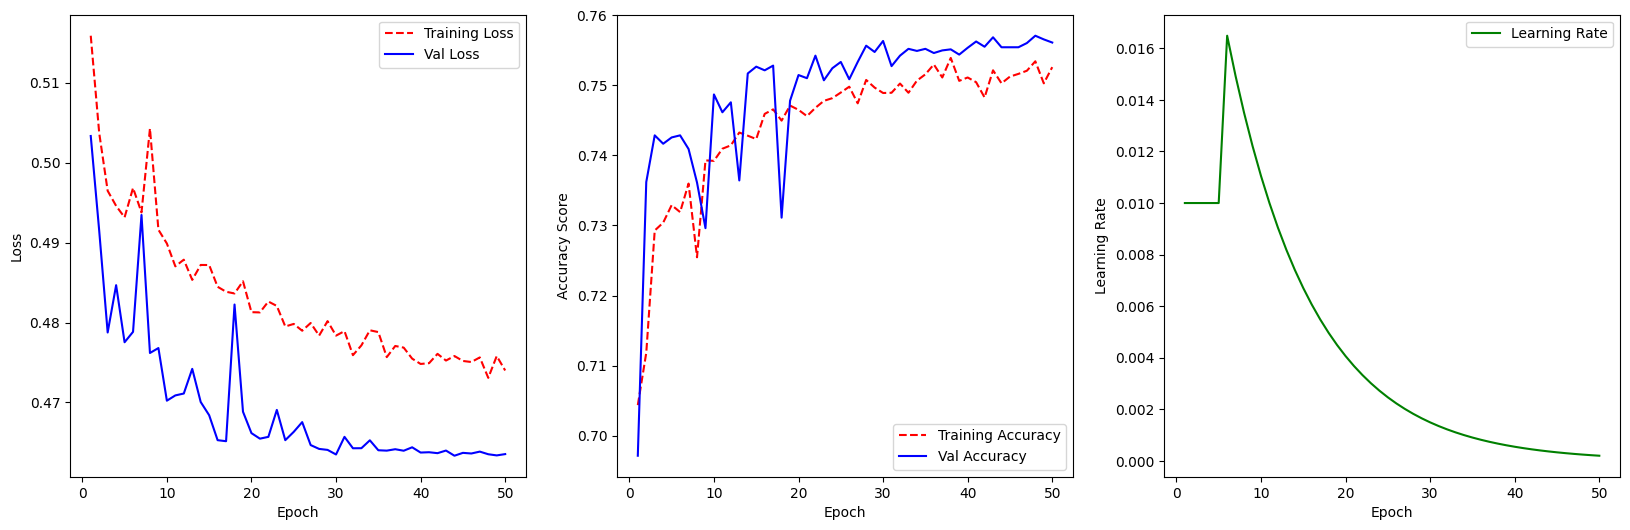

In [ ]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.001, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return network_

def custom_LearningRate_schedular(epoch):
    if epoch < 5:
        return 0.01
    else:
        return 0.01 * tf.math.exp(0.1 * (10 - epoch))


lr_scheduler = LearningRateScheduler(custom_LearningRate_schedular)

network=createNetwork(X_train)
history = network.fit(X_train,
                            y_train,
                            epochs=50,
                            verbose=1,
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            callbacks=[lr_scheduler]
                            )
printHistory2(history)

test_loss, test_acc = network.evaluate(X_test, y_test)
print("relu Adam leatining dynamic learning  " + str(test_acc))

##Regular dataest

Epoch 1/50
488/488 [==============================] - 3s 3ms/step - loss: 0.5034 - accuracy: 0.7143 - val_loss: 0.4909 - val_accuracy: 0.7203 - lr: 0.0100
Epoch 2/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4902 - accuracy: 0.7329 - val_loss: 0.4822 - val_accuracy: 0.7350 - lr: 0.0100
Epoch 3/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4889 - accuracy: 0.7418 - val_loss: 0.4740 - val_accuracy: 0.7405 - lr: 0.0100
Epoch 4/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7418 - val_loss: 0.4758 - val_accuracy: 0.7413 - lr: 0.0100
Epoch 5/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7455 - val_loss: 0.4734 - val_accuracy: 0.7456 - lr: 0.0100
Epoch 6/50
488/488 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.7414 - val_loss: 0.4800 - val_accuracy: 0.7442 - lr: 0.0165
Epoch 7/50
488/488 [==============================] - 1s 3ms/step - lo

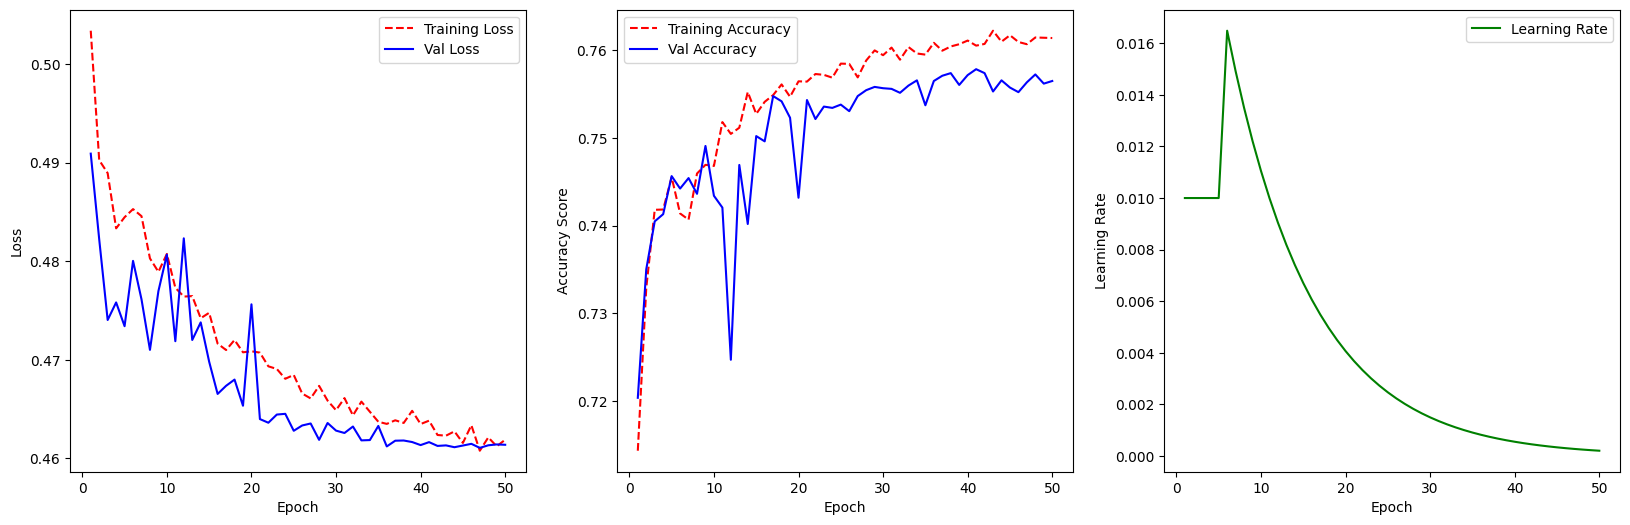

In [ ]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.0005, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return network_

lr_scheduler = LearningRateScheduler(custom_LearningRate_schedular)


network_regula=createNetwork(X_train)
history_regular = network_regula.fit(X_train,
                            y_train,
                            epochs=50,
                            verbose=1,
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            callbacks=[lr_scheduler]
                            )
printHistory2(history_regular)

test_loss, test_acc = network_regula.evaluate(X_test, y_test)
print("Balansiran dataset preciznost  " + str(test_acc))

## BALANSIRAN set

Epoch 1/50
617/617 [==============================] - 3s 3ms/step - loss: 0.5422 - accuracy: 0.7382 - val_loss: 0.5041 - val_accuracy: 0.7536 - lr: 0.0100
Epoch 2/50
617/617 [==============================] - 2s 3ms/step - loss: 0.5305 - accuracy: 0.7406 - val_loss: 0.4967 - val_accuracy: 0.7592 - lr: 0.0100
Epoch 3/50
617/617 [==============================] - 2s 3ms/step - loss: 0.5279 - accuracy: 0.7410 - val_loss: 0.5141 - val_accuracy: 0.7549 - lr: 0.0100
Epoch 4/50
617/617 [==============================] - 2s 3ms/step - loss: 0.5266 - accuracy: 0.7428 - val_loss: 0.4920 - val_accuracy: 0.7567 - lr: 0.0100
Epoch 5/50
617/617 [==============================] - 2s 3ms/step - loss: 0.5211 - accuracy: 0.7444 - val_loss: 0.4844 - val_accuracy: 0.7591 - lr: 0.0100
Epoch 6/50
617/617 [==============================] - 2s 3ms/step - loss: 0.5234 - accuracy: 0.7428 - val_loss: 0.4937 - val_accuracy: 0.7601 - lr: 0.0165
Epoch 7/50
617/617 [==============================] - 2s 3ms/step - lo

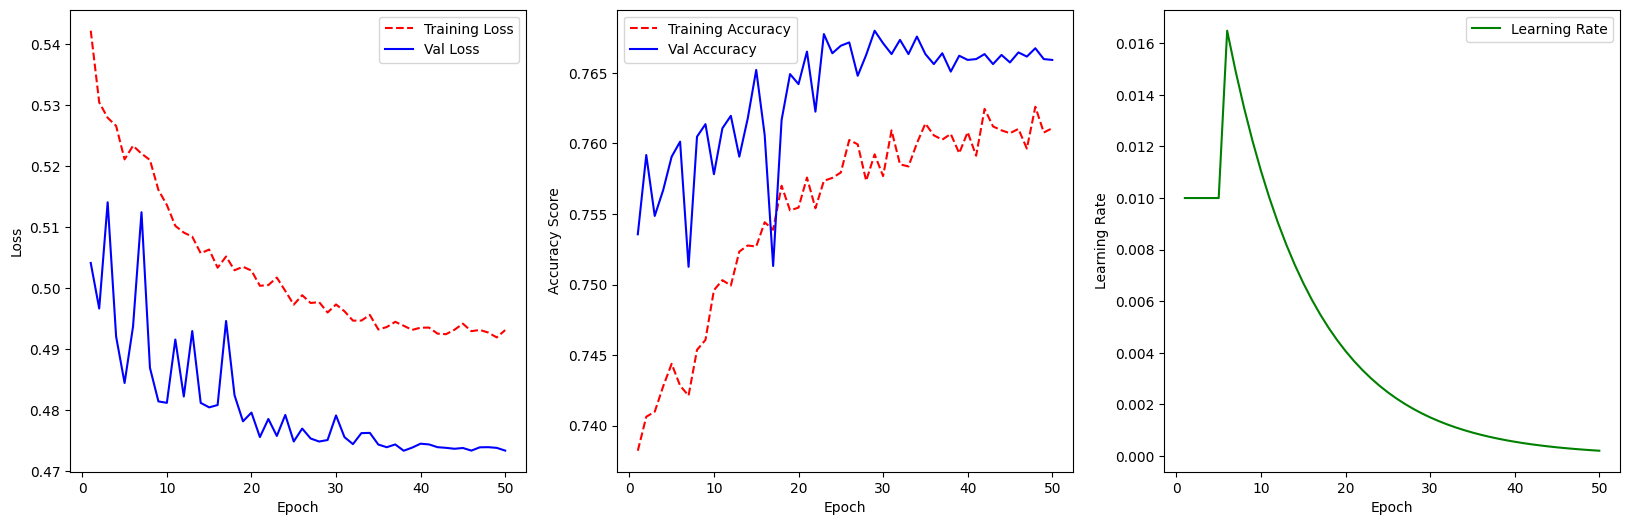

In [ ]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.0005, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train_balanced.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return network_

lr_scheduler = LearningRateScheduler(custom_LearningRate_schedular)


network_balanced=createNetwork(X_train_balanced)
history_balanced = network_balanced.fit(X_train_balanced,
                            y_train_balanced,
                            epochs=50,
                            verbose=1,
                            batch_size=64,
                            validation_data=(X_val_balanced, y_val_balanced),
                            callbacks=[lr_scheduler]
                            )
printHistory2(history_balanced)

test_loss, test_acc = network_balanced.evaluate(X_test_balanced, y_test_balanced)
print("Balansiran dataset preciznost  " + str(test_acc))

##Only imporntant

Epoch 1/50
488/488 [==============================] - 3s 3ms/step - loss: 0.6852 - accuracy: 0.6273 - val_loss: 0.6569 - val_accuracy: 0.6339 - lr: 0.0100
Epoch 2/50
488/488 [==============================] - 2s 3ms/step - loss: 0.6577 - accuracy: 0.6326 - val_loss: 0.6572 - val_accuracy: 0.6339 - lr: 0.0100
Epoch 3/50
488/488 [==============================] - 1s 3ms/step - loss: 0.6577 - accuracy: 0.6326 - val_loss: 0.6570 - val_accuracy: 0.6339 - lr: 0.0100
Epoch 4/50
488/488 [==============================] - 1s 3ms/step - loss: 0.6577 - accuracy: 0.6326 - val_loss: 0.6569 - val_accuracy: 0.6339 - lr: 0.0100
Epoch 5/50
488/488 [==============================] - 1s 3ms/step - loss: 0.6578 - accuracy: 0.6326 - val_loss: 0.6569 - val_accuracy: 0.6339 - lr: 0.0100
Epoch 6/50
488/488 [==============================] - 1s 3ms/step - loss: 0.6578 - accuracy: 0.6326 - val_loss: 0.6569 - val_accuracy: 0.6339 - lr: 0.0165
Epoch 7/50
488/488 [==============================] - 1s 3ms/step - lo

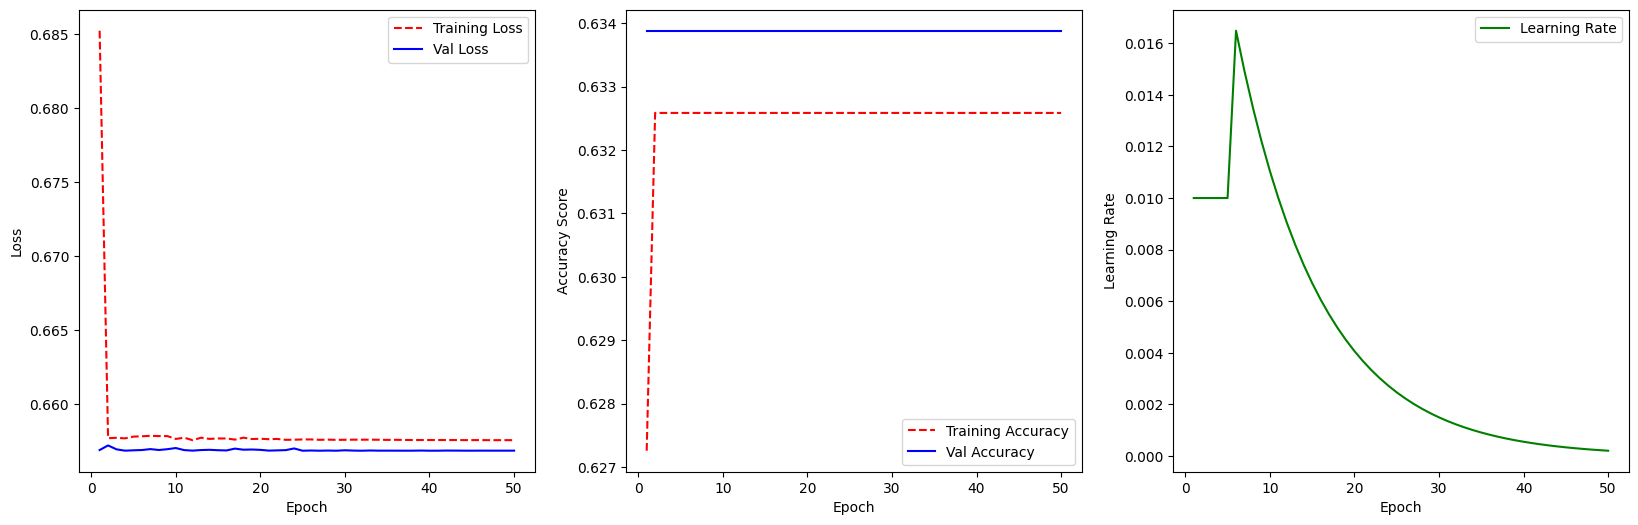

In [ ]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.0005, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return network_

lr_scheduler = LearningRateScheduler(custom_LearningRate_schedular)


network_im=createNetwork(X_train_im)
history_im = network_im.fit(X_train_im,
                            y_train_im,
                            epochs=50,
                            verbose=1,
                            batch_size=64,
                            validation_data=(X_val_im, y_val_im),
                            callbacks=[lr_scheduler]
                            )
printHistory2(history_im)

test_loss, test_acc = network_im.evaluate(X_test_im, y_test)
print("Important dataset preciznost  " + str(test_acc))

### Custom loss function - focal loss


History for regular dataset:
History for balanced dataset:
History for important dataset:


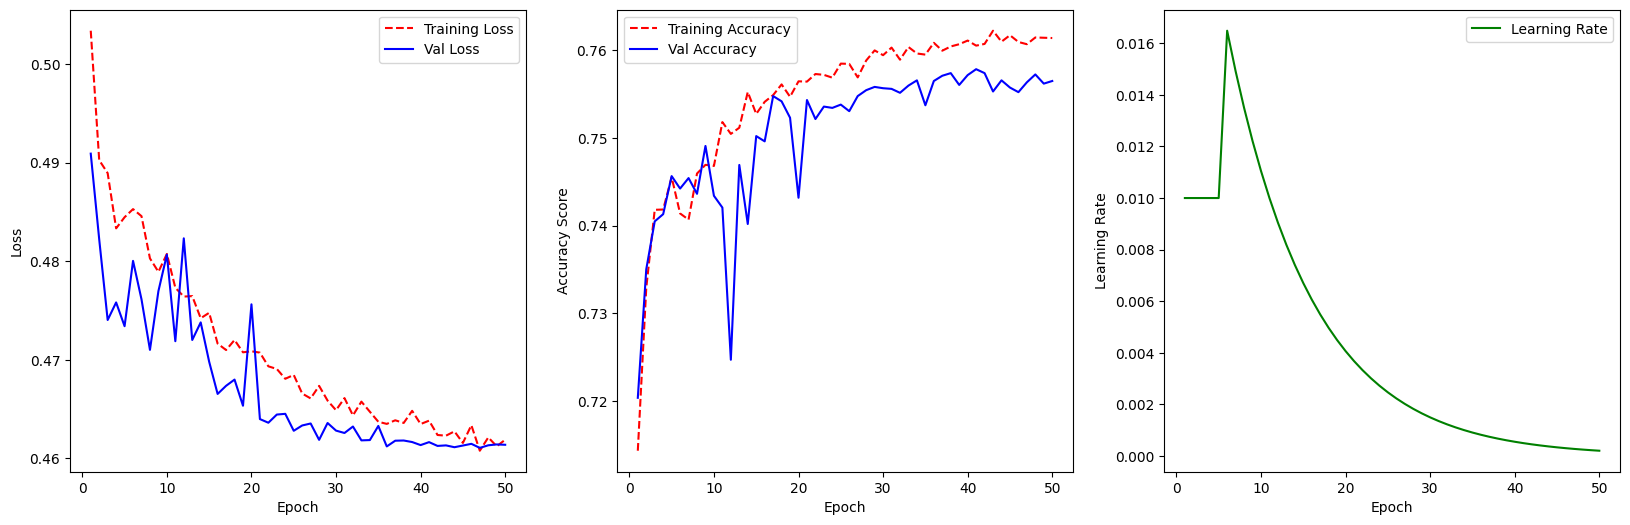

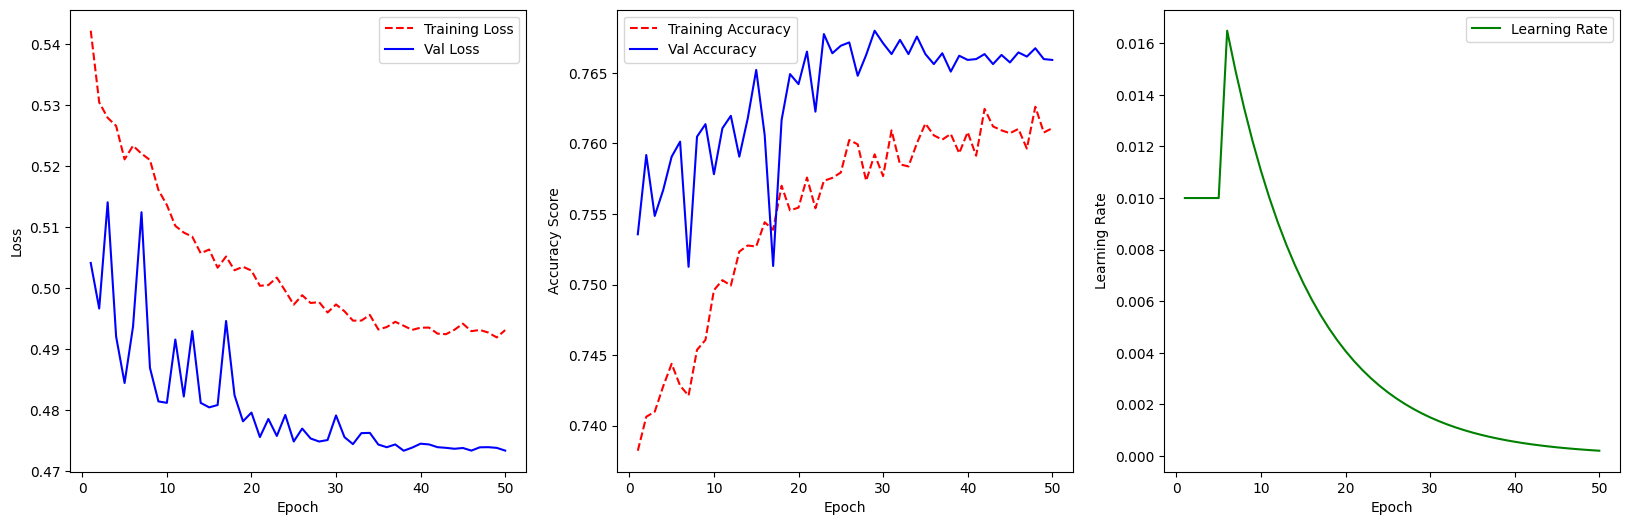

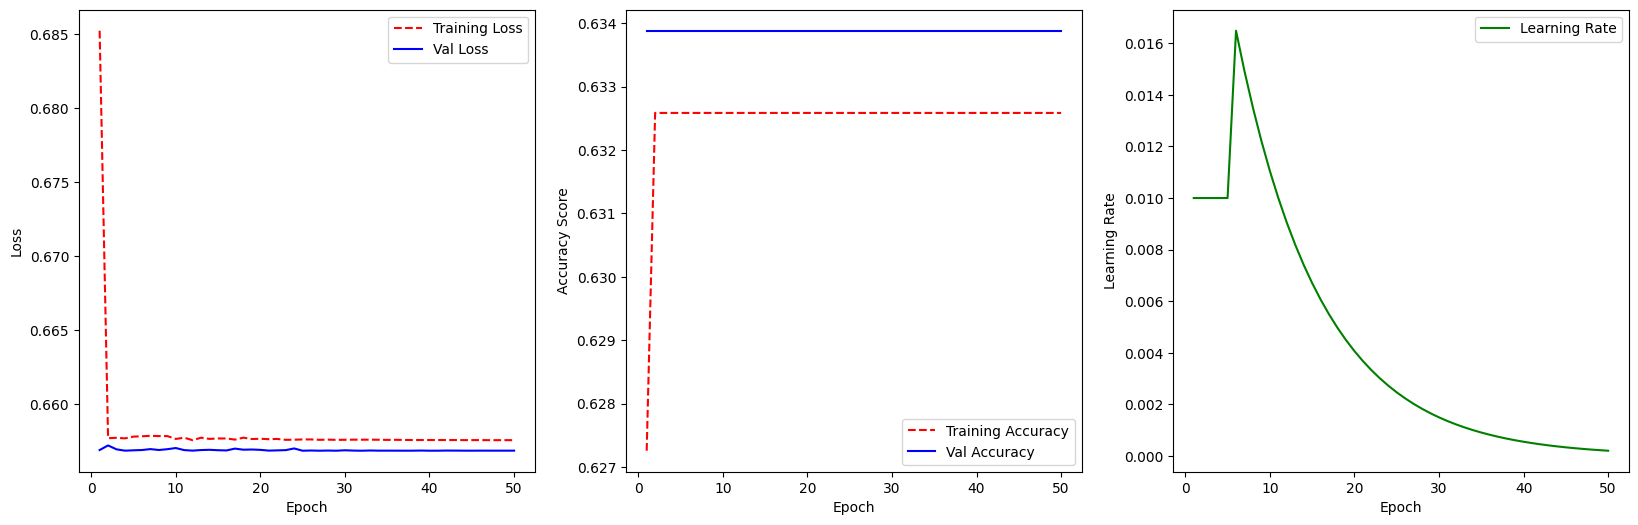

In [ ]:
print("History for regular dataset:")
printHistory2(history_regular)

print("History for balanced dataset:")
printHistory2(history_balanced)

print("History for important dataset:")
printHistory2(history_im)

##Early stop

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
def createNetwork(X_train, loss="binary_crossentropy", learning_rate=0.001, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    early_stopping = EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        verbose=1,
        restore_best_weights=True
    )

    history = network_.fit(X_train,
                            y_train,
                            epochs=100,
                            verbose=1,
                            batch_size=32,
                            callbacks=[early_stopping],
                            validation_data=(X_val, y_val)
                            )

    test_loss, test_acc = network.evaluate(X_test, y_test)
    print("Early stoping preciznost  " + str(test_acc))

    return history

In [ ]:
history = createNetwork(X_train)

Epoch 1/100
975/975 [==============================] - 4s 3ms/step - loss: 0.5100 - accuracy: 0.7074 - val_loss: 0.4817 - val_accuracy: 0.7292
Epoch 2/100
975/975 [==============================] - 3s 3ms/step - loss: 0.4871 - accuracy: 0.7299 - val_loss: 0.4810 - val_accuracy: 0.7332
Epoch 3/100
975/975 [==============================] - 3s 3ms/step - loss: 0.4838 - accuracy: 0.7354 - val_loss: 0.4839 - val_accuracy: 0.7326
Epoch 4/100
975/975 [==============================] - 3s 3ms/step - loss: 0.4819 - accuracy: 0.7464 - val_loss: 0.4721 - val_accuracy: 0.7425
Epoch 5/100
975/975 [==============================] - 3s 3ms/step - loss: 0.4785 - accuracy: 0.7456 - val_loss: 0.4726 - val_accuracy: 0.7426
Epoch 6/100
975/975 [==============================] - 3s 3ms/step - loss: 0.4778 - accuracy: 0.7480 - val_loss: 0.4707 - val_accuracy: 0.7469
Epoch 7/100
975/975 [==============================] - 3s 3ms/step - loss: 0.4760 - accuracy: 0.7497 - val_loss: 0.4701 - val_accuracy: 0.7449

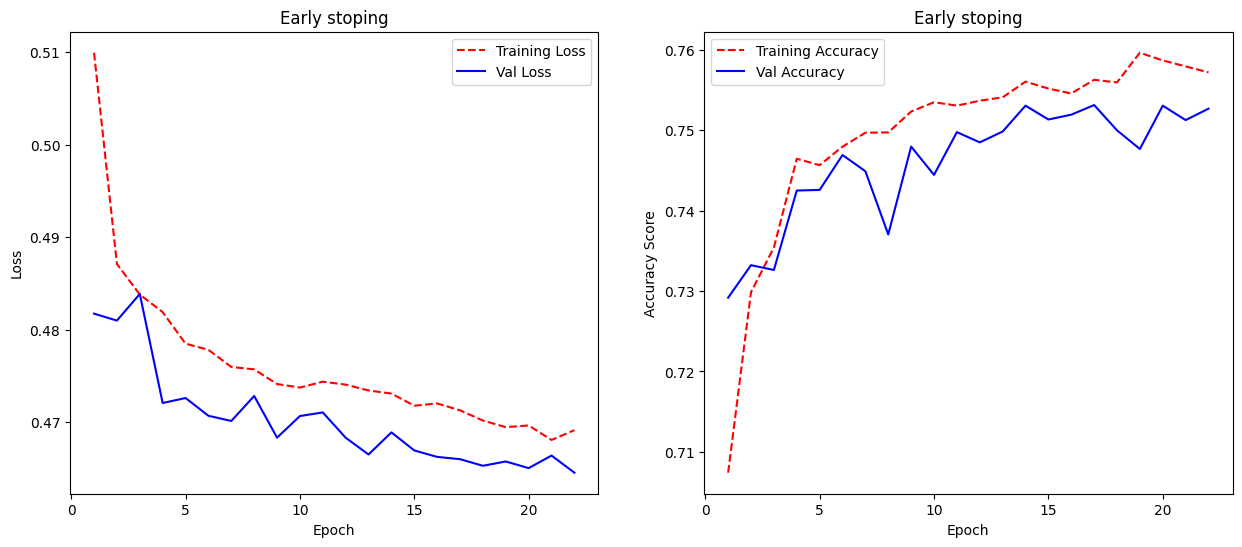

In [ ]:
printHistory(history, "Early stoping")

## Custom loss

In [ ]:
from keras import backend as K
import math


In [ ]:
# gamma - higher gamma makes loss function more selective
# alpha - controls the balance between positive and negative examples in loss function
def custom_loss(y_true, y_pred, gamma=2, alpha=0.25):
    # clip the predictions to avoid log(0) errors
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    y_true = K.clip(y_true, K.epsilon(), 1.0 - K.epsilon())

    # calculate the focal loss
    pt = y_true * y_pred + (1.0 - y_true) * (1.0 - y_pred)
    focal_loss = - alpha * K.pow(1.0 - pt, gamma) * K.log(pt)

    # return the mean focal loss
    return K.mean(focal_loss)

Epoch 1/50
488/488 [==============================] - 3s 4ms/step - loss: 0.0341 - accuracy: 0.6640 - val_loss: 0.0320 - val_accuracy: 0.6339 - lr: 0.0100
Epoch 2/50
488/488 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.6813 - val_loss: 0.0316 - val_accuracy: 0.7089 - lr: 0.0100
Epoch 3/50
488/488 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.6804 - val_loss: 0.0322 - val_accuracy: 0.7209 - lr: 0.0100
Epoch 4/50
488/488 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.6893 - val_loss: 0.0318 - val_accuracy: 0.7031 - lr: 0.0100
Epoch 5/50
488/488 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.6992 - val_loss: 0.0313 - val_accuracy: 0.7254 - lr: 0.0100
Epoch 6/50
488/488 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.6945 - val_loss: 0.0320 - val_accuracy: 0.7159 - lr: 0.0165
Epoch 7/50
488/488 [==============================] - 1s 3ms/step - lo

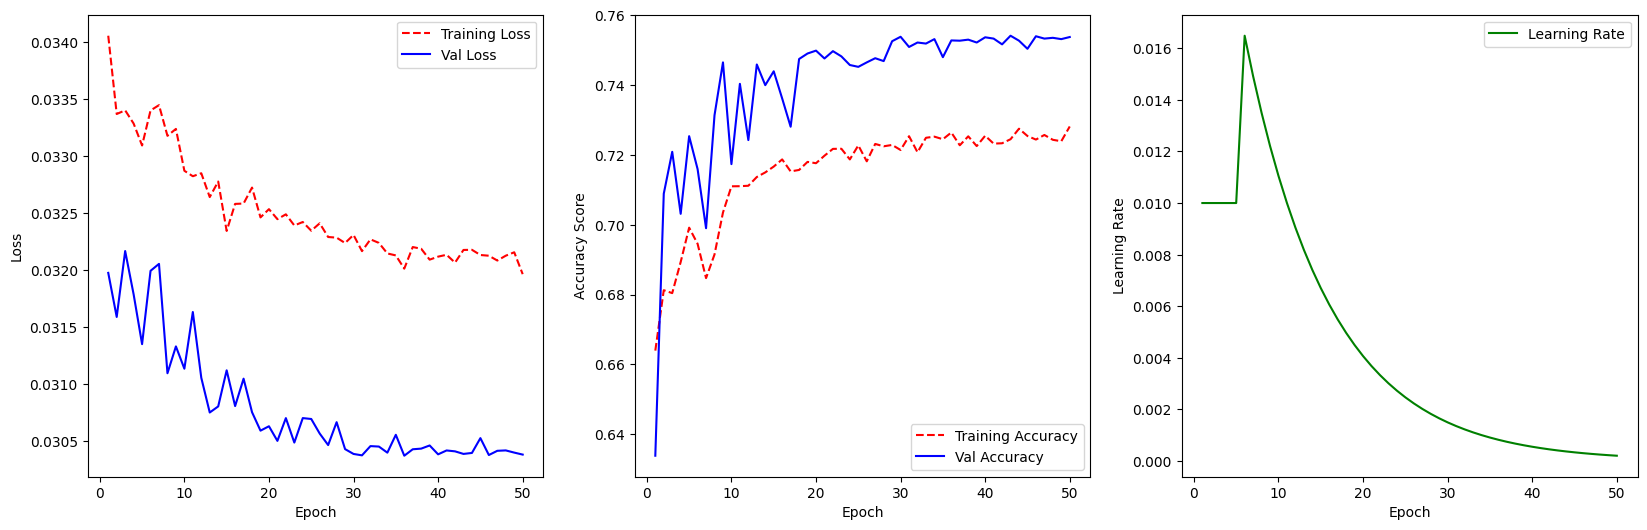

In [ ]:

def createNetwork(X_train, loss=custom_loss, learning_rate=0.0005, activation="relu"):
    optimizer = Adam(learning_rate=learning_rate)
    network_ = Sequential()

    network_.add(Dense(units=64, activation=activation, input_shape=(X_train.shape[1],)))
    network_.add(Dense(units=32, activation=activation))
    network_.add(Dense(units=16, activation=activation))
    network_.add(Dense(units=8, activation=activation))
    network_.add(Dropout(0.3))
    network_.add(Dense(units=1, activation="sigmoid"))

    network_.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return network_

def custom_LearningRate_schedular(epoch):
    if epoch < 5:
        return 0.01
    else:
        return 0.01 * tf.math.exp(0.1 * (10 - epoch))


lr_scheduler = LearningRateScheduler(custom_LearningRate_schedular)


network=createNetwork(X_train)
history = network.fit(X_train,
                            y_train,
                            epochs=50,
                            verbose=1,
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            callbacks=[lr_scheduler],
                            )
printHistory2(history)

test_loss, test_acc = network.evaluate(X_test, y_test)
print("Custom loss preciznost  " + str(test_acc))

## Confusion matrix


441/441 [==============================] - 1s 2ms/step


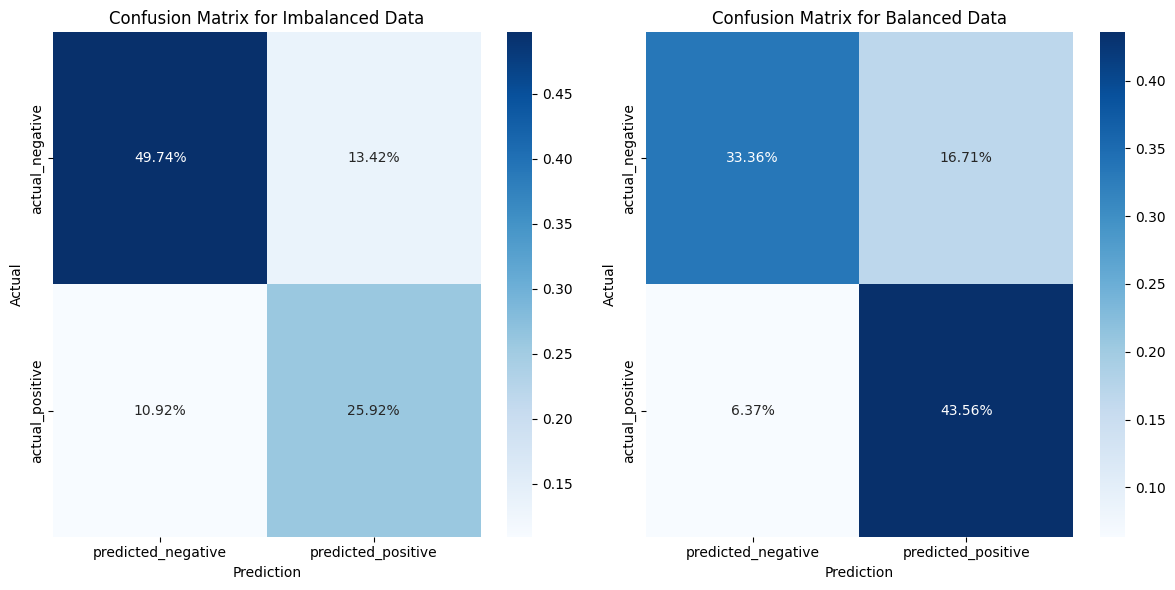

In [ ]:
y_pred = network_regula.predict(X_test)
y_pred = (y_pred > 0.5)*1

y_pred_balanced = network_balanced.predict(X_test_balanced)
y_pred_balanced = (y_pred_balanced > 0.5)*1

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for imbalanced data
cf_matrix_imbalanced = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_imbalanced/np.sum(cf_matrix_imbalanced), annot=True,
            fmt='.2%', cmap='Blues',
            xticklabels=['predicted_negative', 'predicted_positive'],
            yticklabels=['actual_negative', 'actual_positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix for Imbalanced Data')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for balanced data
cf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
sns.heatmap(cf_matrix_balanced/np.sum(cf_matrix_balanced), annot=True,
            fmt='.2%', cmap='Blues',
            xticklabels=['predicted_negative', 'predicted_positive'],
            yticklabels=['actual_negative', 'actual_positive'], ax=axes[1])
axes[1].set_title('Confusion Matrix for Balanced Data')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Roc curve


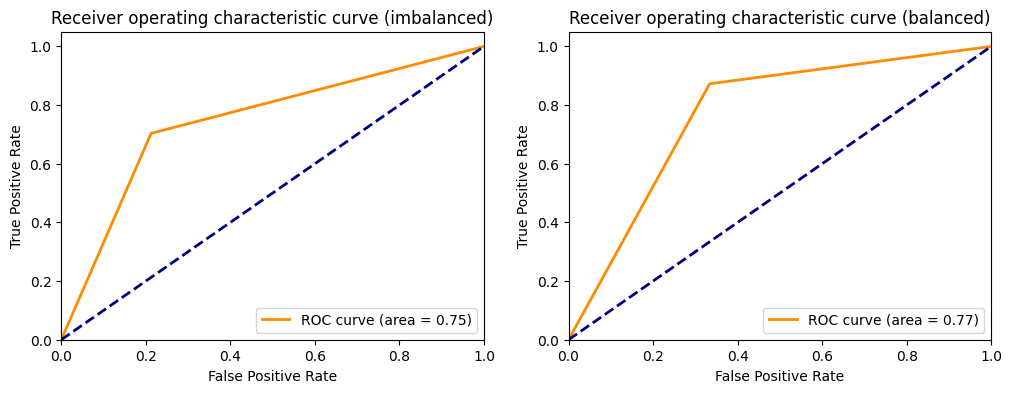

In [ ]:
# Compute fpr, tpr, thresholds and auc for imbalanced dataset


fpr_imbalanced, tpr_imbalanced, thresholds_imbalanced = roc_curve(y_test, y_pred)
roc_auc_imbalanced = auc(fpr_imbalanced, tpr_imbalanced)

# Compute fpr, tpr, thresholds and auc for balanced dataset
fpr_balanced, tpr_balanced, thresholds_balanced = roc_curve(y_test_balanced, y_pred_balanced)
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot ROC curve for imbalanced dataset
axs[0].plot(fpr_imbalanced, tpr_imbalanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_imbalanced)
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver operating characteristic curve (imbalanced)')
axs[0].legend(loc="lower right")

# Plot ROC curve for balanced dataset
axs[1].plot(fpr_balanced, tpr_balanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_balanced)
axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic curve (balanced)')
axs[1].legend(loc="lower right")
